In [0]:
import keras
import matplotlib.pyplot as plt
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train/127.5-1

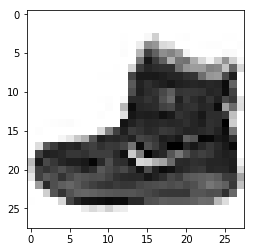

In [35]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
latent_dim = 100
height = 28
width = 28
channels = 1
noise = Input(shape=(latent_dim,))
img_shape = (height, width, channels)

In [39]:
def build_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=latent_dim))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  #model.add(Dense(2048))
  #model.add(LeakyReLU(alpha=0.2))
  #model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(np.prod(img_shape), activation='tanh'))
  model.add(Reshape(img_shape))

  model.summary()

  img = model(noise)

  return Model(noise, img)

generator = build_generator()
z = Input(shape=(latent_dim,))
img = generator(z)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_17 (Dense)             (None, 1024)             

In [40]:
def build_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=img_shape))
  #model.add(Dense(512))
  #model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  
  model.summary()

  img = Input(shape=img_shape)
  validity = model(img)

  return Model(img, validity)

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, latent_dim))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.685914, acc.: 34.38%] [G loss: 0.643101]


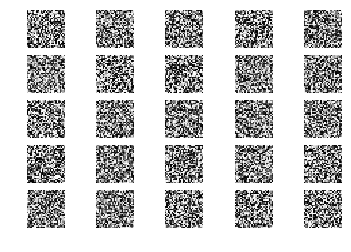

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.450387, acc.: 65.62%] [G loss: 0.753509]
2 [D loss: 0.354189, acc.: 79.69%] [G loss: 0.860209]
3 [D loss: 0.344517, acc.: 84.38%] [G loss: 1.015648]
4 [D loss: 0.243172, acc.: 98.44%] [G loss: 1.106303]
5 [D loss: 0.241017, acc.: 96.88%] [G loss: 1.211730]
6 [D loss: 0.219741, acc.: 98.44%] [G loss: 1.349795]
7 [D loss: 0.187963, acc.: 98.44%] [G loss: 1.447972]
8 [D loss: 0.162024, acc.: 100.00%] [G loss: 1.602298]
9 [D loss: 0.152944, acc.: 100.00%] [G loss: 1.652099]
10 [D loss: 0.126891, acc.: 100.00%] [G loss: 1.768992]
11 [D loss: 0.125423, acc.: 100.00%] [G loss: 1.876076]
12 [D loss: 0.105871, acc.: 100.00%] [G loss: 1.903759]
13 [D loss: 0.104242, acc.: 100.00%] [G loss: 1.929644]
14 [D loss: 0.090265, acc.: 100.00%] [G loss: 2.056312]
15 [D loss: 0.101109, acc.: 98.44%] [G loss: 2.121510]
16 [D loss: 0.083594, acc.: 100.00%] [G loss: 2.177846]
17 [D loss: 0.083914, acc.: 100.00%] [G loss: 2.174653]
18 [D loss: 0.073486, acc.: 100.00%] [G loss: 2.199642]
19 [D los

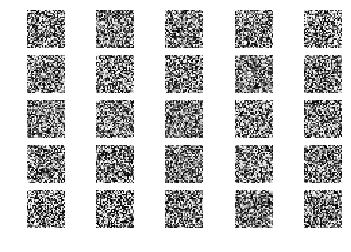

51 [D loss: 0.023100, acc.: 100.00%] [G loss: 3.467547]
52 [D loss: 0.020140, acc.: 100.00%] [G loss: 3.528087]
53 [D loss: 0.024511, acc.: 100.00%] [G loss: 3.729258]
54 [D loss: 0.022146, acc.: 100.00%] [G loss: 3.588381]
55 [D loss: 0.015465, acc.: 100.00%] [G loss: 3.580017]
56 [D loss: 0.023855, acc.: 100.00%] [G loss: 3.570058]
57 [D loss: 0.016732, acc.: 100.00%] [G loss: 3.757381]
58 [D loss: 0.018465, acc.: 100.00%] [G loss: 3.821015]
59 [D loss: 0.023886, acc.: 100.00%] [G loss: 3.739724]
60 [D loss: 0.023067, acc.: 100.00%] [G loss: 3.772588]
61 [D loss: 0.023881, acc.: 100.00%] [G loss: 3.847866]
62 [D loss: 0.017061, acc.: 100.00%] [G loss: 3.998189]
63 [D loss: 0.020926, acc.: 100.00%] [G loss: 3.816829]
64 [D loss: 0.016017, acc.: 100.00%] [G loss: 3.826232]
65 [D loss: 0.018309, acc.: 100.00%] [G loss: 3.898413]
66 [D loss: 0.016993, acc.: 100.00%] [G loss: 3.965030]
67 [D loss: 0.037301, acc.: 98.44%] [G loss: 3.938615]
68 [D loss: 0.020854, acc.: 100.00%] [G loss: 3.9

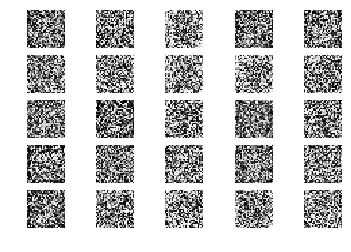

101 [D loss: 0.015673, acc.: 100.00%] [G loss: 4.384802]
102 [D loss: 0.016442, acc.: 100.00%] [G loss: 4.307448]
103 [D loss: 0.012369, acc.: 100.00%] [G loss: 4.337300]
104 [D loss: 0.014531, acc.: 100.00%] [G loss: 4.400425]
105 [D loss: 0.012059, acc.: 100.00%] [G loss: 4.373343]
106 [D loss: 0.015049, acc.: 100.00%] [G loss: 4.490277]
107 [D loss: 0.020947, acc.: 100.00%] [G loss: 4.512852]
108 [D loss: 0.015719, acc.: 100.00%] [G loss: 4.562637]
109 [D loss: 0.016293, acc.: 100.00%] [G loss: 4.390914]
110 [D loss: 0.016494, acc.: 100.00%] [G loss: 4.467314]
111 [D loss: 0.012634, acc.: 100.00%] [G loss: 4.403279]
112 [D loss: 0.027196, acc.: 100.00%] [G loss: 4.548041]
113 [D loss: 0.012523, acc.: 100.00%] [G loss: 4.458266]
114 [D loss: 0.019104, acc.: 100.00%] [G loss: 4.586967]
115 [D loss: 0.022898, acc.: 100.00%] [G loss: 4.628702]
116 [D loss: 0.019958, acc.: 100.00%] [G loss: 4.740716]
117 [D loss: 0.022740, acc.: 100.00%] [G loss: 4.860918]
118 [D loss: 0.012800, acc.: 10

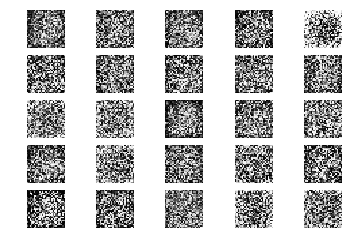

151 [D loss: 0.037604, acc.: 100.00%] [G loss: 4.968401]
152 [D loss: 0.019362, acc.: 100.00%] [G loss: 4.857761]
153 [D loss: 0.058026, acc.: 98.44%] [G loss: 4.537808]
154 [D loss: 0.060334, acc.: 96.88%] [G loss: 4.662991]
155 [D loss: 0.136187, acc.: 96.88%] [G loss: 4.727307]
156 [D loss: 0.044714, acc.: 100.00%] [G loss: 4.633754]
157 [D loss: 0.036909, acc.: 100.00%] [G loss: 4.804121]
158 [D loss: 0.152734, acc.: 93.75%] [G loss: 4.065315]
159 [D loss: 0.066755, acc.: 98.44%] [G loss: 4.695168]
160 [D loss: 0.087335, acc.: 98.44%] [G loss: 4.515700]
161 [D loss: 0.048752, acc.: 98.44%] [G loss: 4.981003]
162 [D loss: 0.058981, acc.: 100.00%] [G loss: 4.543598]
163 [D loss: 0.060974, acc.: 96.88%] [G loss: 5.037156]
164 [D loss: 0.065055, acc.: 96.88%] [G loss: 4.982540]
165 [D loss: 0.119469, acc.: 95.31%] [G loss: 4.756291]
166 [D loss: 0.052518, acc.: 98.44%] [G loss: 4.680281]
167 [D loss: 0.118740, acc.: 96.88%] [G loss: 4.312646]
168 [D loss: 0.059925, acc.: 95.31%] [G los

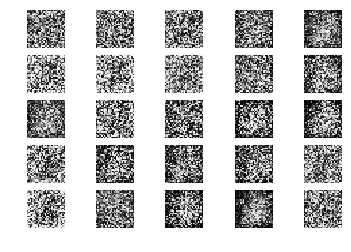

201 [D loss: 0.160275, acc.: 92.19%] [G loss: 4.369945]
202 [D loss: 0.074702, acc.: 96.88%] [G loss: 4.854480]
203 [D loss: 0.152708, acc.: 95.31%] [G loss: 3.900170]
204 [D loss: 0.079946, acc.: 95.31%] [G loss: 4.346385]
205 [D loss: 0.214044, acc.: 92.19%] [G loss: 4.233157]
206 [D loss: 0.115974, acc.: 95.31%] [G loss: 4.181414]
207 [D loss: 0.250044, acc.: 90.62%] [G loss: 3.690773]
208 [D loss: 0.046856, acc.: 100.00%] [G loss: 4.183429]
209 [D loss: 0.168709, acc.: 92.19%] [G loss: 4.656318]
210 [D loss: 0.188833, acc.: 95.31%] [G loss: 4.295193]
211 [D loss: 0.062552, acc.: 98.44%] [G loss: 4.317350]
212 [D loss: 0.093391, acc.: 98.44%] [G loss: 3.974277]
213 [D loss: 0.065536, acc.: 98.44%] [G loss: 4.102462]
214 [D loss: 0.246547, acc.: 92.19%] [G loss: 4.541603]
215 [D loss: 0.080411, acc.: 95.31%] [G loss: 4.052939]
216 [D loss: 0.098554, acc.: 96.88%] [G loss: 4.193147]
217 [D loss: 0.152753, acc.: 93.75%] [G loss: 4.045042]
218 [D loss: 0.117703, acc.: 96.88%] [G loss: 4

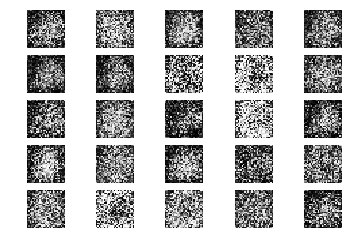

251 [D loss: 0.133516, acc.: 93.75%] [G loss: 4.788324]
252 [D loss: 0.360046, acc.: 82.81%] [G loss: 3.375961]
253 [D loss: 0.108869, acc.: 98.44%] [G loss: 4.237197]
254 [D loss: 0.241108, acc.: 89.06%] [G loss: 4.232337]
255 [D loss: 0.163913, acc.: 95.31%] [G loss: 4.399099]
256 [D loss: 0.156845, acc.: 93.75%] [G loss: 4.776532]
257 [D loss: 0.186206, acc.: 90.62%] [G loss: 3.760583]
258 [D loss: 0.118479, acc.: 95.31%] [G loss: 3.958001]
259 [D loss: 0.169440, acc.: 93.75%] [G loss: 3.721774]
260 [D loss: 0.138690, acc.: 96.88%] [G loss: 4.315862]
261 [D loss: 0.142356, acc.: 96.88%] [G loss: 3.913131]
262 [D loss: 0.143113, acc.: 93.75%] [G loss: 3.822529]
263 [D loss: 0.375373, acc.: 81.25%] [G loss: 3.752499]
264 [D loss: 0.185855, acc.: 92.19%] [G loss: 4.261709]
265 [D loss: 0.291736, acc.: 85.94%] [G loss: 3.813533]
266 [D loss: 0.198609, acc.: 89.06%] [G loss: 3.689586]
267 [D loss: 0.070040, acc.: 98.44%] [G loss: 4.253597]
268 [D loss: 0.206075, acc.: 92.19%] [G loss: 4.

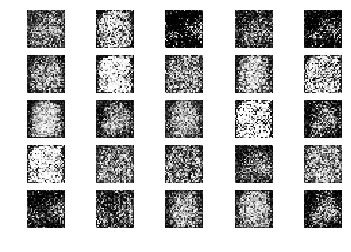

301 [D loss: 0.365614, acc.: 84.38%] [G loss: 3.097853]
302 [D loss: 0.270430, acc.: 85.94%] [G loss: 4.134503]
303 [D loss: 0.374555, acc.: 93.75%] [G loss: 3.452425]
304 [D loss: 0.198915, acc.: 93.75%] [G loss: 3.111836]
305 [D loss: 0.289372, acc.: 84.38%] [G loss: 4.467321]
306 [D loss: 0.410425, acc.: 82.81%] [G loss: 3.474364]
307 [D loss: 0.247133, acc.: 87.50%] [G loss: 3.584574]
308 [D loss: 0.141660, acc.: 96.88%] [G loss: 4.081309]
309 [D loss: 0.150703, acc.: 95.31%] [G loss: 4.679093]
310 [D loss: 0.334950, acc.: 87.50%] [G loss: 4.031048]
311 [D loss: 0.280299, acc.: 89.06%] [G loss: 4.771475]
312 [D loss: 0.177245, acc.: 90.62%] [G loss: 4.691054]
313 [D loss: 0.304965, acc.: 78.12%] [G loss: 4.138371]
314 [D loss: 0.512421, acc.: 79.69%] [G loss: 3.432982]
315 [D loss: 0.273365, acc.: 87.50%] [G loss: 3.863406]
316 [D loss: 0.188473, acc.: 92.19%] [G loss: 5.274847]
317 [D loss: 0.324978, acc.: 85.94%] [G loss: 3.854450]
318 [D loss: 0.196491, acc.: 92.19%] [G loss: 3.

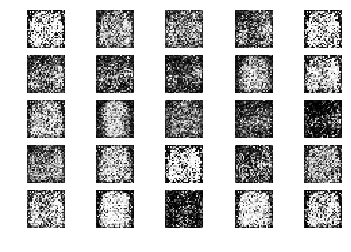

351 [D loss: 0.507902, acc.: 82.81%] [G loss: 3.103437]
352 [D loss: 0.262241, acc.: 90.62%] [G loss: 3.317794]
353 [D loss: 0.370940, acc.: 79.69%] [G loss: 3.187999]
354 [D loss: 0.203696, acc.: 96.88%] [G loss: 3.060841]
355 [D loss: 0.338281, acc.: 87.50%] [G loss: 3.107118]
356 [D loss: 0.259032, acc.: 93.75%] [G loss: 2.827169]
357 [D loss: 0.272558, acc.: 89.06%] [G loss: 3.843464]
358 [D loss: 0.431042, acc.: 81.25%] [G loss: 2.381071]
359 [D loss: 0.308218, acc.: 82.81%] [G loss: 2.874252]
360 [D loss: 0.206270, acc.: 93.75%] [G loss: 3.344828]
361 [D loss: 0.207949, acc.: 92.19%] [G loss: 3.608159]
362 [D loss: 0.440545, acc.: 87.50%] [G loss: 2.809876]
363 [D loss: 0.397513, acc.: 79.69%] [G loss: 2.765063]
364 [D loss: 0.278499, acc.: 93.75%] [G loss: 2.712840]
365 [D loss: 0.316546, acc.: 90.62%] [G loss: 3.930817]
366 [D loss: 0.836432, acc.: 64.06%] [G loss: 2.300643]
367 [D loss: 0.400532, acc.: 81.25%] [G loss: 3.182513]
368 [D loss: 0.299790, acc.: 84.38%] [G loss: 3.

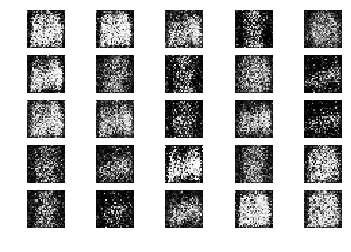

401 [D loss: 0.347188, acc.: 84.38%] [G loss: 3.166245]
402 [D loss: 1.077721, acc.: 60.94%] [G loss: 2.444079]
403 [D loss: 0.383364, acc.: 85.94%] [G loss: 2.776489]
404 [D loss: 0.384197, acc.: 84.38%] [G loss: 2.053926]
405 [D loss: 0.437005, acc.: 84.38%] [G loss: 2.477413]
406 [D loss: 0.414830, acc.: 87.50%] [G loss: 2.519514]
407 [D loss: 0.764928, acc.: 56.25%] [G loss: 2.445923]
408 [D loss: 0.554034, acc.: 75.00%] [G loss: 2.184750]
409 [D loss: 0.710250, acc.: 64.06%] [G loss: 2.422125]
410 [D loss: 0.915641, acc.: 53.12%] [G loss: 1.635585]
411 [D loss: 0.482726, acc.: 84.38%] [G loss: 2.052682]
412 [D loss: 0.435748, acc.: 85.94%] [G loss: 2.405391]
413 [D loss: 0.326157, acc.: 93.75%] [G loss: 2.465585]
414 [D loss: 0.502003, acc.: 71.88%] [G loss: 2.472531]
415 [D loss: 0.497671, acc.: 79.69%] [G loss: 2.568575]
416 [D loss: 0.579094, acc.: 70.31%] [G loss: 2.041419]
417 [D loss: 0.427460, acc.: 79.69%] [G loss: 2.678485]
418 [D loss: 0.438172, acc.: 79.69%] [G loss: 2.

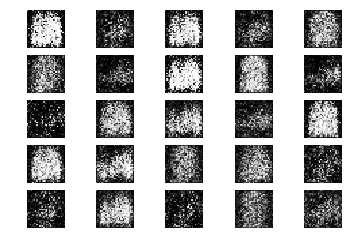

451 [D loss: 0.632417, acc.: 65.62%] [G loss: 1.531763]
452 [D loss: 0.591217, acc.: 78.12%] [G loss: 1.426016]
453 [D loss: 0.735294, acc.: 56.25%] [G loss: 1.474302]
454 [D loss: 0.774429, acc.: 65.62%] [G loss: 1.574988]
455 [D loss: 0.765304, acc.: 64.06%] [G loss: 1.701152]
456 [D loss: 0.685057, acc.: 59.38%] [G loss: 1.425843]
457 [D loss: 0.597741, acc.: 68.75%] [G loss: 1.470006]
458 [D loss: 0.699180, acc.: 68.75%] [G loss: 1.516386]
459 [D loss: 0.557842, acc.: 73.44%] [G loss: 1.590782]
460 [D loss: 0.651296, acc.: 68.75%] [G loss: 1.265480]
461 [D loss: 0.711747, acc.: 54.69%] [G loss: 1.362688]
462 [D loss: 0.558746, acc.: 75.00%] [G loss: 1.652034]
463 [D loss: 0.610927, acc.: 75.00%] [G loss: 1.412424]
464 [D loss: 0.590565, acc.: 65.62%] [G loss: 1.387114]
465 [D loss: 0.541542, acc.: 73.44%] [G loss: 1.267064]
466 [D loss: 0.608219, acc.: 71.88%] [G loss: 1.401411]
467 [D loss: 0.678097, acc.: 60.94%] [G loss: 1.155474]
468 [D loss: 0.511244, acc.: 71.88%] [G loss: 1.

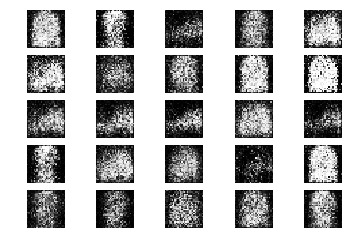

501 [D loss: 0.439808, acc.: 79.69%] [G loss: 1.316858]
502 [D loss: 0.601774, acc.: 71.88%] [G loss: 1.275810]
503 [D loss: 0.572953, acc.: 71.88%] [G loss: 1.309902]
504 [D loss: 0.531760, acc.: 75.00%] [G loss: 1.342555]
505 [D loss: 0.658487, acc.: 62.50%] [G loss: 1.292833]
506 [D loss: 0.532151, acc.: 73.44%] [G loss: 1.465206]
507 [D loss: 0.460307, acc.: 82.81%] [G loss: 1.593091]
508 [D loss: 0.663295, acc.: 75.00%] [G loss: 1.345900]
509 [D loss: 0.470731, acc.: 78.12%] [G loss: 1.261140]
510 [D loss: 0.552050, acc.: 75.00%] [G loss: 1.362048]
511 [D loss: 0.449691, acc.: 89.06%] [G loss: 1.460270]
512 [D loss: 0.453404, acc.: 84.38%] [G loss: 1.442798]
513 [D loss: 0.643930, acc.: 70.31%] [G loss: 1.358103]
514 [D loss: 0.545667, acc.: 75.00%] [G loss: 1.128869]
515 [D loss: 0.531892, acc.: 67.19%] [G loss: 1.388106]
516 [D loss: 0.567647, acc.: 82.81%] [G loss: 1.414410]
517 [D loss: 0.625467, acc.: 65.62%] [G loss: 1.195179]
518 [D loss: 0.562436, acc.: 73.44%] [G loss: 1.

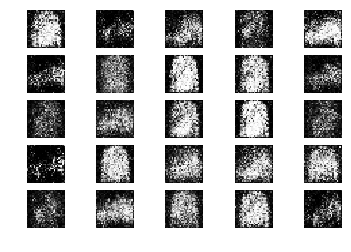

551 [D loss: 0.652087, acc.: 60.94%] [G loss: 1.390881]
552 [D loss: 0.694854, acc.: 65.62%] [G loss: 1.199782]
553 [D loss: 0.527419, acc.: 76.56%] [G loss: 1.305422]
554 [D loss: 0.604206, acc.: 67.19%] [G loss: 1.327538]
555 [D loss: 0.571790, acc.: 78.12%] [G loss: 1.320934]
556 [D loss: 0.603875, acc.: 64.06%] [G loss: 1.167150]
557 [D loss: 0.648107, acc.: 64.06%] [G loss: 1.045953]
558 [D loss: 0.608294, acc.: 68.75%] [G loss: 1.307425]
559 [D loss: 0.507292, acc.: 78.12%] [G loss: 1.369034]
560 [D loss: 0.631098, acc.: 62.50%] [G loss: 1.296669]
561 [D loss: 0.596637, acc.: 64.06%] [G loss: 1.153150]
562 [D loss: 0.636529, acc.: 62.50%] [G loss: 1.221731]
563 [D loss: 0.679669, acc.: 62.50%] [G loss: 1.235825]
564 [D loss: 0.673728, acc.: 64.06%] [G loss: 1.113934]
565 [D loss: 0.574117, acc.: 70.31%] [G loss: 1.403780]
566 [D loss: 0.563395, acc.: 67.19%] [G loss: 1.357909]
567 [D loss: 0.499343, acc.: 82.81%] [G loss: 1.395951]
568 [D loss: 0.684186, acc.: 59.38%] [G loss: 1.

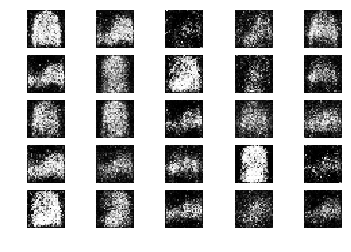

601 [D loss: 0.577596, acc.: 71.88%] [G loss: 1.270133]
602 [D loss: 0.573490, acc.: 68.75%] [G loss: 1.255367]
603 [D loss: 0.676919, acc.: 51.56%] [G loss: 1.090531]
604 [D loss: 0.543386, acc.: 73.44%] [G loss: 1.113269]
605 [D loss: 0.446942, acc.: 89.06%] [G loss: 1.224571]
606 [D loss: 0.561294, acc.: 60.94%] [G loss: 1.126810]
607 [D loss: 0.517261, acc.: 78.12%] [G loss: 1.220574]
608 [D loss: 0.602322, acc.: 70.31%] [G loss: 0.973287]
609 [D loss: 0.499604, acc.: 75.00%] [G loss: 1.068743]
610 [D loss: 0.585802, acc.: 73.44%] [G loss: 1.204286]
611 [D loss: 0.458447, acc.: 81.25%] [G loss: 1.250745]
612 [D loss: 0.661773, acc.: 67.19%] [G loss: 1.184812]
613 [D loss: 0.569563, acc.: 70.31%] [G loss: 1.069731]
614 [D loss: 0.516194, acc.: 81.25%] [G loss: 1.139978]
615 [D loss: 0.541845, acc.: 67.19%] [G loss: 1.152885]
616 [D loss: 0.635636, acc.: 62.50%] [G loss: 1.087931]
617 [D loss: 0.544359, acc.: 76.56%] [G loss: 1.190177]
618 [D loss: 0.590647, acc.: 71.88%] [G loss: 1.

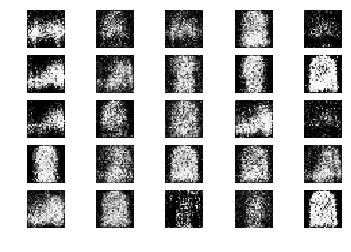

651 [D loss: 0.489338, acc.: 79.69%] [G loss: 1.249849]
652 [D loss: 0.500056, acc.: 82.81%] [G loss: 1.367624]
653 [D loss: 0.545036, acc.: 75.00%] [G loss: 1.128906]
654 [D loss: 0.580953, acc.: 76.56%] [G loss: 1.099043]
655 [D loss: 0.619592, acc.: 68.75%] [G loss: 1.175336]
656 [D loss: 0.560646, acc.: 76.56%] [G loss: 1.132384]
657 [D loss: 0.540639, acc.: 75.00%] [G loss: 1.222532]
658 [D loss: 0.582427, acc.: 67.19%] [G loss: 1.251058]
659 [D loss: 0.624440, acc.: 64.06%] [G loss: 1.170760]
660 [D loss: 0.546532, acc.: 75.00%] [G loss: 1.176021]
661 [D loss: 0.515121, acc.: 79.69%] [G loss: 1.202413]
662 [D loss: 0.530802, acc.: 75.00%] [G loss: 1.187507]
663 [D loss: 0.460663, acc.: 81.25%] [G loss: 1.180153]
664 [D loss: 0.602074, acc.: 73.44%] [G loss: 1.018870]
665 [D loss: 0.607242, acc.: 65.62%] [G loss: 1.170625]
666 [D loss: 0.543931, acc.: 76.56%] [G loss: 1.173572]
667 [D loss: 0.472923, acc.: 82.81%] [G loss: 1.184219]
668 [D loss: 0.633024, acc.: 67.19%] [G loss: 1.

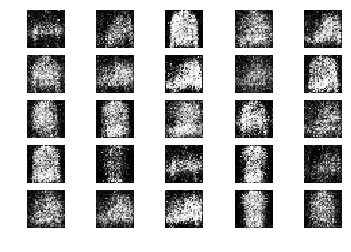

701 [D loss: 0.604338, acc.: 68.75%] [G loss: 1.074576]
702 [D loss: 0.614071, acc.: 64.06%] [G loss: 1.114940]
703 [D loss: 0.492358, acc.: 84.38%] [G loss: 1.070899]
704 [D loss: 0.542444, acc.: 76.56%] [G loss: 1.114871]
705 [D loss: 0.533021, acc.: 78.12%] [G loss: 1.163408]
706 [D loss: 0.653575, acc.: 68.75%] [G loss: 1.222227]
707 [D loss: 0.655348, acc.: 60.94%] [G loss: 1.153534]
708 [D loss: 0.571047, acc.: 67.19%] [G loss: 1.189909]
709 [D loss: 0.611565, acc.: 64.06%] [G loss: 1.109456]
710 [D loss: 0.541456, acc.: 78.12%] [G loss: 1.093046]
711 [D loss: 0.538501, acc.: 75.00%] [G loss: 1.118259]
712 [D loss: 0.598215, acc.: 67.19%] [G loss: 1.124243]
713 [D loss: 0.612839, acc.: 73.44%] [G loss: 1.007276]
714 [D loss: 0.553394, acc.: 73.44%] [G loss: 1.026574]
715 [D loss: 0.570005, acc.: 71.88%] [G loss: 0.928327]
716 [D loss: 0.541846, acc.: 71.88%] [G loss: 0.998628]
717 [D loss: 0.504665, acc.: 71.88%] [G loss: 1.089161]
718 [D loss: 0.674315, acc.: 67.19%] [G loss: 1.

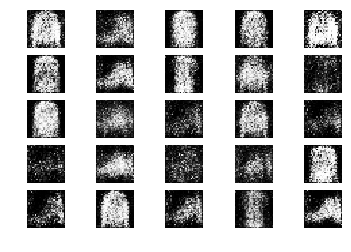

751 [D loss: 0.556231, acc.: 75.00%] [G loss: 0.998292]
752 [D loss: 0.614321, acc.: 62.50%] [G loss: 1.261125]
753 [D loss: 0.660392, acc.: 65.62%] [G loss: 1.203426]
754 [D loss: 0.597159, acc.: 64.06%] [G loss: 1.154738]
755 [D loss: 0.529083, acc.: 70.31%] [G loss: 1.150280]
756 [D loss: 0.551956, acc.: 71.88%] [G loss: 1.138124]
757 [D loss: 0.622648, acc.: 65.62%] [G loss: 1.213277]
758 [D loss: 0.585314, acc.: 71.88%] [G loss: 1.025086]
759 [D loss: 0.679544, acc.: 57.81%] [G loss: 1.036694]
760 [D loss: 0.606104, acc.: 64.06%] [G loss: 1.172029]
761 [D loss: 0.698896, acc.: 53.12%] [G loss: 1.119734]
762 [D loss: 0.630858, acc.: 65.62%] [G loss: 0.983499]
763 [D loss: 0.672638, acc.: 57.81%] [G loss: 0.948459]
764 [D loss: 0.731562, acc.: 51.56%] [G loss: 0.978208]
765 [D loss: 0.597728, acc.: 71.88%] [G loss: 1.095902]
766 [D loss: 0.627618, acc.: 62.50%] [G loss: 1.155977]
767 [D loss: 0.568021, acc.: 76.56%] [G loss: 1.078645]
768 [D loss: 0.618369, acc.: 67.19%] [G loss: 1.

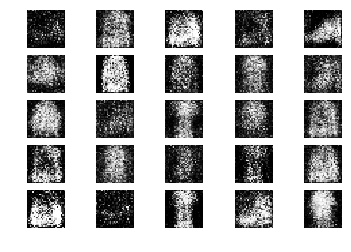

801 [D loss: 0.543988, acc.: 73.44%] [G loss: 1.193801]
802 [D loss: 0.597253, acc.: 68.75%] [G loss: 1.314225]
803 [D loss: 0.588046, acc.: 68.75%] [G loss: 1.097264]
804 [D loss: 0.659614, acc.: 62.50%] [G loss: 1.267828]
805 [D loss: 0.627344, acc.: 64.06%] [G loss: 1.035870]
806 [D loss: 0.561039, acc.: 67.19%] [G loss: 0.904483]
807 [D loss: 0.581355, acc.: 71.88%] [G loss: 1.075856]
808 [D loss: 0.569301, acc.: 68.75%] [G loss: 1.058080]
809 [D loss: 0.538343, acc.: 75.00%] [G loss: 0.989152]
810 [D loss: 0.546991, acc.: 71.88%] [G loss: 1.113742]
811 [D loss: 0.544550, acc.: 68.75%] [G loss: 1.236963]
812 [D loss: 0.610471, acc.: 60.94%] [G loss: 1.117078]
813 [D loss: 0.528488, acc.: 75.00%] [G loss: 1.072240]
814 [D loss: 0.501132, acc.: 75.00%] [G loss: 1.070001]
815 [D loss: 0.639681, acc.: 62.50%] [G loss: 1.322601]
816 [D loss: 0.585636, acc.: 65.62%] [G loss: 1.302394]
817 [D loss: 0.635121, acc.: 65.62%] [G loss: 1.004804]
818 [D loss: 0.569109, acc.: 73.44%] [G loss: 1.

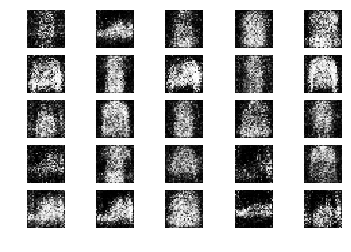

851 [D loss: 0.597555, acc.: 65.62%] [G loss: 1.135598]
852 [D loss: 0.649745, acc.: 57.81%] [G loss: 1.265330]
853 [D loss: 0.599992, acc.: 67.19%] [G loss: 1.059373]
854 [D loss: 0.556154, acc.: 70.31%] [G loss: 0.932898]
855 [D loss: 0.694046, acc.: 62.50%] [G loss: 0.928218]
856 [D loss: 0.535511, acc.: 76.56%] [G loss: 1.016828]
857 [D loss: 0.582490, acc.: 65.62%] [G loss: 0.977550]
858 [D loss: 0.537064, acc.: 68.75%] [G loss: 1.025105]
859 [D loss: 0.676834, acc.: 67.19%] [G loss: 1.055991]
860 [D loss: 0.557921, acc.: 71.88%] [G loss: 1.067661]
861 [D loss: 0.587392, acc.: 73.44%] [G loss: 1.055051]
862 [D loss: 0.560829, acc.: 68.75%] [G loss: 0.975230]
863 [D loss: 0.628414, acc.: 60.94%] [G loss: 0.978316]
864 [D loss: 0.617616, acc.: 64.06%] [G loss: 0.939680]
865 [D loss: 0.585997, acc.: 73.44%] [G loss: 0.999238]
866 [D loss: 0.652961, acc.: 57.81%] [G loss: 1.108210]
867 [D loss: 0.561957, acc.: 70.31%] [G loss: 1.063521]
868 [D loss: 0.630099, acc.: 68.75%] [G loss: 1.

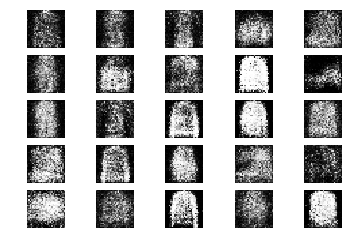

901 [D loss: 0.620563, acc.: 59.38%] [G loss: 1.013375]
902 [D loss: 0.544299, acc.: 76.56%] [G loss: 0.932167]
903 [D loss: 0.727922, acc.: 56.25%] [G loss: 0.953807]
904 [D loss: 0.567521, acc.: 65.62%] [G loss: 1.117246]
905 [D loss: 0.612124, acc.: 65.62%] [G loss: 1.110177]
906 [D loss: 0.654061, acc.: 68.75%] [G loss: 0.935359]
907 [D loss: 0.633027, acc.: 54.69%] [G loss: 0.996547]
908 [D loss: 0.622527, acc.: 73.44%] [G loss: 0.857391]
909 [D loss: 0.693263, acc.: 60.94%] [G loss: 0.835597]
910 [D loss: 0.552909, acc.: 73.44%] [G loss: 0.962734]
911 [D loss: 0.644531, acc.: 65.62%] [G loss: 0.878473]
912 [D loss: 0.555431, acc.: 67.19%] [G loss: 0.996315]
913 [D loss: 0.667948, acc.: 64.06%] [G loss: 1.003350]
914 [D loss: 0.691154, acc.: 54.69%] [G loss: 1.089740]
915 [D loss: 0.579585, acc.: 67.19%] [G loss: 1.007694]
916 [D loss: 0.636604, acc.: 60.94%] [G loss: 1.008586]
917 [D loss: 0.658685, acc.: 60.94%] [G loss: 0.971424]
918 [D loss: 0.556050, acc.: 65.62%] [G loss: 1.

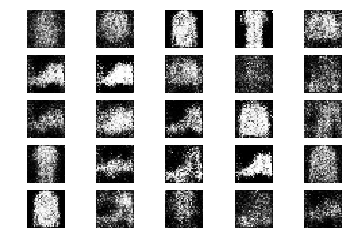

951 [D loss: 0.620901, acc.: 64.06%] [G loss: 1.023634]
952 [D loss: 0.622253, acc.: 68.75%] [G loss: 0.942162]
953 [D loss: 0.592504, acc.: 70.31%] [G loss: 1.099241]
954 [D loss: 0.667298, acc.: 62.50%] [G loss: 0.998358]
955 [D loss: 0.590392, acc.: 67.19%] [G loss: 1.015362]
956 [D loss: 0.710378, acc.: 56.25%] [G loss: 1.081296]
957 [D loss: 0.592976, acc.: 62.50%] [G loss: 1.060849]
958 [D loss: 0.602984, acc.: 68.75%] [G loss: 0.962362]
959 [D loss: 0.602903, acc.: 67.19%] [G loss: 0.965803]
960 [D loss: 0.660622, acc.: 60.94%] [G loss: 0.935011]
961 [D loss: 0.632492, acc.: 68.75%] [G loss: 0.996243]
962 [D loss: 0.630594, acc.: 68.75%] [G loss: 0.920265]
963 [D loss: 0.585972, acc.: 67.19%] [G loss: 0.945891]
964 [D loss: 0.578501, acc.: 70.31%] [G loss: 0.955356]
965 [D loss: 0.525198, acc.: 71.88%] [G loss: 0.876478]
966 [D loss: 0.605859, acc.: 64.06%] [G loss: 0.976051]
967 [D loss: 0.539221, acc.: 78.12%] [G loss: 0.938247]
968 [D loss: 0.587165, acc.: 70.31%] [G loss: 0.

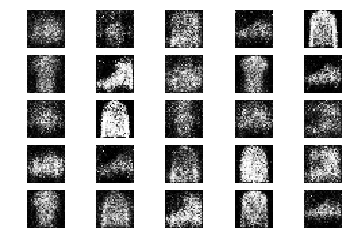

1001 [D loss: 0.629669, acc.: 60.94%] [G loss: 0.940189]
1002 [D loss: 0.595580, acc.: 71.88%] [G loss: 0.978128]
1003 [D loss: 0.523702, acc.: 78.12%] [G loss: 0.964098]
1004 [D loss: 0.593835, acc.: 71.88%] [G loss: 1.005146]
1005 [D loss: 0.637647, acc.: 59.38%] [G loss: 0.992190]
1006 [D loss: 0.700329, acc.: 50.00%] [G loss: 0.895599]
1007 [D loss: 0.606075, acc.: 65.62%] [G loss: 0.950115]
1008 [D loss: 0.518964, acc.: 71.88%] [G loss: 0.840282]
1009 [D loss: 0.592932, acc.: 65.62%] [G loss: 0.951474]
1010 [D loss: 0.575981, acc.: 68.75%] [G loss: 0.931446]
1011 [D loss: 0.625650, acc.: 62.50%] [G loss: 0.973685]
1012 [D loss: 0.638087, acc.: 65.62%] [G loss: 0.970073]
1013 [D loss: 0.581913, acc.: 67.19%] [G loss: 0.998041]
1014 [D loss: 0.610647, acc.: 67.19%] [G loss: 0.945880]
1015 [D loss: 0.534207, acc.: 76.56%] [G loss: 1.023409]
1016 [D loss: 0.720309, acc.: 57.81%] [G loss: 0.850868]
1017 [D loss: 0.643013, acc.: 57.81%] [G loss: 0.984741]
1018 [D loss: 0.641974, acc.: 6

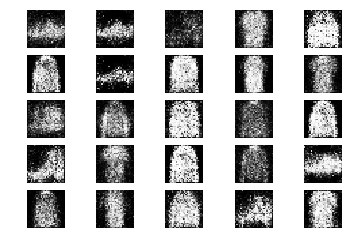

1051 [D loss: 0.663527, acc.: 60.94%] [G loss: 1.045616]
1052 [D loss: 0.565286, acc.: 70.31%] [G loss: 1.014357]
1053 [D loss: 0.603351, acc.: 68.75%] [G loss: 0.886914]
1054 [D loss: 0.567794, acc.: 65.62%] [G loss: 0.947380]
1055 [D loss: 0.584596, acc.: 67.19%] [G loss: 0.904571]
1056 [D loss: 0.635752, acc.: 65.62%] [G loss: 0.935076]
1057 [D loss: 0.614258, acc.: 67.19%] [G loss: 1.009781]
1058 [D loss: 0.635722, acc.: 62.50%] [G loss: 0.915701]
1059 [D loss: 0.607106, acc.: 70.31%] [G loss: 1.002808]
1060 [D loss: 0.584597, acc.: 71.88%] [G loss: 1.064223]
1061 [D loss: 0.616781, acc.: 64.06%] [G loss: 0.965072]
1062 [D loss: 0.526170, acc.: 78.12%] [G loss: 0.846903]
1063 [D loss: 0.645070, acc.: 60.94%] [G loss: 0.916327]
1064 [D loss: 0.652756, acc.: 62.50%] [G loss: 0.847301]
1065 [D loss: 0.570877, acc.: 67.19%] [G loss: 0.978662]
1066 [D loss: 0.664500, acc.: 64.06%] [G loss: 0.954629]
1067 [D loss: 0.547404, acc.: 71.88%] [G loss: 1.050418]
1068 [D loss: 0.688670, acc.: 5

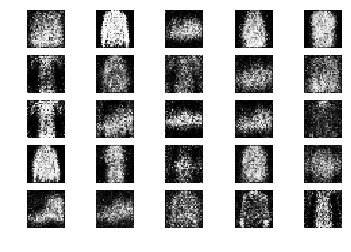

1101 [D loss: 0.569202, acc.: 76.56%] [G loss: 0.814027]
1102 [D loss: 0.648507, acc.: 65.62%] [G loss: 0.943470]
1103 [D loss: 0.601846, acc.: 67.19%] [G loss: 1.034112]
1104 [D loss: 0.608790, acc.: 68.75%] [G loss: 0.828189]
1105 [D loss: 0.602427, acc.: 68.75%] [G loss: 0.794170]
1106 [D loss: 0.533791, acc.: 75.00%] [G loss: 0.919675]
1107 [D loss: 0.706956, acc.: 54.69%] [G loss: 0.954203]
1108 [D loss: 0.643135, acc.: 64.06%] [G loss: 0.919464]
1109 [D loss: 0.611400, acc.: 67.19%] [G loss: 0.935095]
1110 [D loss: 0.672270, acc.: 67.19%] [G loss: 0.882616]
1111 [D loss: 0.674117, acc.: 59.38%] [G loss: 0.905798]
1112 [D loss: 0.649899, acc.: 60.94%] [G loss: 0.894976]
1113 [D loss: 0.620495, acc.: 70.31%] [G loss: 0.886743]
1114 [D loss: 0.624971, acc.: 56.25%] [G loss: 1.034647]
1115 [D loss: 0.613625, acc.: 70.31%] [G loss: 0.981837]
1116 [D loss: 0.590549, acc.: 71.88%] [G loss: 0.947172]
1117 [D loss: 0.611226, acc.: 71.88%] [G loss: 0.930194]
1118 [D loss: 0.660799, acc.: 5

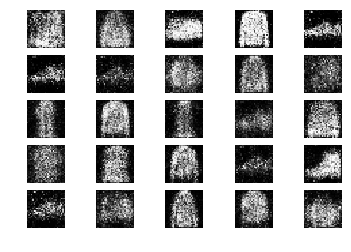

1151 [D loss: 0.559473, acc.: 78.12%] [G loss: 0.937886]
1152 [D loss: 0.659763, acc.: 62.50%] [G loss: 0.861747]
1153 [D loss: 0.617770, acc.: 67.19%] [G loss: 0.954906]
1154 [D loss: 0.665441, acc.: 54.69%] [G loss: 0.868390]
1155 [D loss: 0.619067, acc.: 68.75%] [G loss: 0.877010]
1156 [D loss: 0.637274, acc.: 62.50%] [G loss: 0.874259]
1157 [D loss: 0.587059, acc.: 71.88%] [G loss: 0.902858]
1158 [D loss: 0.667752, acc.: 53.12%] [G loss: 0.841057]
1159 [D loss: 0.638474, acc.: 68.75%] [G loss: 1.022728]
1160 [D loss: 0.622711, acc.: 64.06%] [G loss: 0.909715]
1161 [D loss: 0.584064, acc.: 70.31%] [G loss: 0.931465]
1162 [D loss: 0.598985, acc.: 67.19%] [G loss: 0.926084]
1163 [D loss: 0.706149, acc.: 53.12%] [G loss: 0.932137]
1164 [D loss: 0.641928, acc.: 64.06%] [G loss: 0.968863]
1165 [D loss: 0.625772, acc.: 60.94%] [G loss: 0.898937]
1166 [D loss: 0.587228, acc.: 65.62%] [G loss: 0.885039]
1167 [D loss: 0.576676, acc.: 65.62%] [G loss: 0.964211]
1168 [D loss: 0.588093, acc.: 7

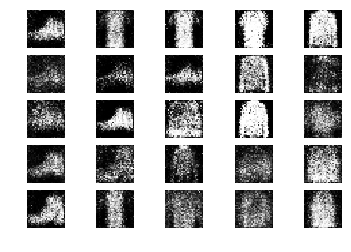

1201 [D loss: 0.604752, acc.: 73.44%] [G loss: 0.912001]
1202 [D loss: 0.706483, acc.: 53.12%] [G loss: 0.826390]
1203 [D loss: 0.631236, acc.: 62.50%] [G loss: 0.829991]
1204 [D loss: 0.532513, acc.: 71.88%] [G loss: 0.891469]
1205 [D loss: 0.543121, acc.: 81.25%] [G loss: 0.878469]
1206 [D loss: 0.690618, acc.: 53.12%] [G loss: 0.973054]
1207 [D loss: 0.582891, acc.: 65.62%] [G loss: 0.885391]
1208 [D loss: 0.661182, acc.: 54.69%] [G loss: 0.923583]
1209 [D loss: 0.636953, acc.: 70.31%] [G loss: 0.806349]
1210 [D loss: 0.582440, acc.: 79.69%] [G loss: 0.964200]
1211 [D loss: 0.649510, acc.: 57.81%] [G loss: 0.862309]
1212 [D loss: 0.643748, acc.: 64.06%] [G loss: 0.910078]
1213 [D loss: 0.639439, acc.: 64.06%] [G loss: 0.905585]
1214 [D loss: 0.572784, acc.: 73.44%] [G loss: 0.989740]
1215 [D loss: 0.613140, acc.: 65.62%] [G loss: 0.904324]
1216 [D loss: 0.622486, acc.: 64.06%] [G loss: 0.915240]
1217 [D loss: 0.653864, acc.: 60.94%] [G loss: 0.873060]
1218 [D loss: 0.671288, acc.: 5

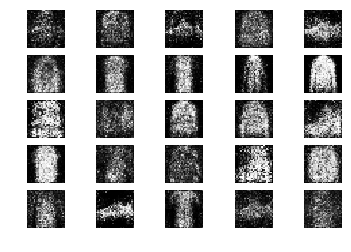

1251 [D loss: 0.586250, acc.: 68.75%] [G loss: 0.934206]
1252 [D loss: 0.594568, acc.: 71.88%] [G loss: 1.035893]
1253 [D loss: 0.593906, acc.: 67.19%] [G loss: 0.869681]
1254 [D loss: 0.703503, acc.: 57.81%] [G loss: 0.917928]
1255 [D loss: 0.637542, acc.: 62.50%] [G loss: 0.888120]
1256 [D loss: 0.646630, acc.: 62.50%] [G loss: 0.867472]
1257 [D loss: 0.685236, acc.: 56.25%] [G loss: 0.880962]
1258 [D loss: 0.603790, acc.: 68.75%] [G loss: 0.853066]
1259 [D loss: 0.660628, acc.: 60.94%] [G loss: 0.863638]
1260 [D loss: 0.707974, acc.: 53.12%] [G loss: 1.008581]
1261 [D loss: 0.570795, acc.: 75.00%] [G loss: 0.883534]
1262 [D loss: 0.627634, acc.: 60.94%] [G loss: 0.917001]
1263 [D loss: 0.594902, acc.: 78.12%] [G loss: 0.998508]
1264 [D loss: 0.737888, acc.: 54.69%] [G loss: 0.865945]
1265 [D loss: 0.680012, acc.: 59.38%] [G loss: 0.983534]
1266 [D loss: 0.607949, acc.: 71.88%] [G loss: 0.902773]
1267 [D loss: 0.634349, acc.: 64.06%] [G loss: 0.904810]
1268 [D loss: 0.644404, acc.: 5

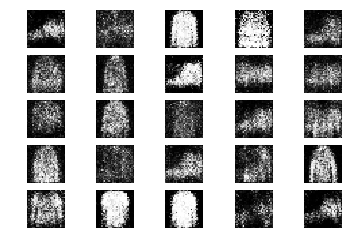

1301 [D loss: 0.539833, acc.: 76.56%] [G loss: 0.901046]
1302 [D loss: 0.593939, acc.: 71.88%] [G loss: 0.764898]
1303 [D loss: 0.623230, acc.: 68.75%] [G loss: 0.863609]
1304 [D loss: 0.617019, acc.: 67.19%] [G loss: 0.897224]
1305 [D loss: 0.633565, acc.: 62.50%] [G loss: 0.812219]
1306 [D loss: 0.645658, acc.: 67.19%] [G loss: 0.920542]
1307 [D loss: 0.589312, acc.: 68.75%] [G loss: 0.829191]
1308 [D loss: 0.657512, acc.: 64.06%] [G loss: 0.949700]
1309 [D loss: 0.671639, acc.: 60.94%] [G loss: 0.861249]
1310 [D loss: 0.568083, acc.: 75.00%] [G loss: 0.905867]
1311 [D loss: 0.599449, acc.: 71.88%] [G loss: 0.926359]
1312 [D loss: 0.623439, acc.: 70.31%] [G loss: 0.994563]
1313 [D loss: 0.631216, acc.: 59.38%] [G loss: 0.853351]
1314 [D loss: 0.653591, acc.: 59.38%] [G loss: 0.876076]
1315 [D loss: 0.654289, acc.: 67.19%] [G loss: 0.838485]
1316 [D loss: 0.628950, acc.: 71.88%] [G loss: 0.961985]
1317 [D loss: 0.636991, acc.: 67.19%] [G loss: 1.000382]
1318 [D loss: 0.584703, acc.: 6

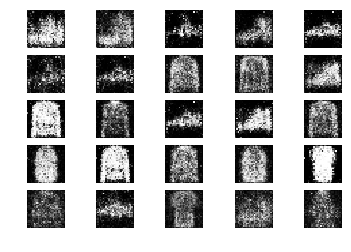

1351 [D loss: 0.620856, acc.: 68.75%] [G loss: 0.849573]
1352 [D loss: 0.570892, acc.: 71.88%] [G loss: 0.850023]
1353 [D loss: 0.610654, acc.: 64.06%] [G loss: 0.882709]
1354 [D loss: 0.617662, acc.: 70.31%] [G loss: 0.885062]
1355 [D loss: 0.638200, acc.: 64.06%] [G loss: 0.880424]
1356 [D loss: 0.625329, acc.: 62.50%] [G loss: 0.858314]
1357 [D loss: 0.724876, acc.: 51.56%] [G loss: 0.891962]
1358 [D loss: 0.607274, acc.: 70.31%] [G loss: 0.861367]
1359 [D loss: 0.636302, acc.: 67.19%] [G loss: 0.883805]
1360 [D loss: 0.625724, acc.: 67.19%] [G loss: 0.865828]
1361 [D loss: 0.645466, acc.: 62.50%] [G loss: 0.861961]
1362 [D loss: 0.642820, acc.: 65.62%] [G loss: 0.833349]
1363 [D loss: 0.604276, acc.: 68.75%] [G loss: 0.847407]
1364 [D loss: 0.579017, acc.: 75.00%] [G loss: 0.871577]
1365 [D loss: 0.666499, acc.: 53.12%] [G loss: 0.944616]
1366 [D loss: 0.593088, acc.: 68.75%] [G loss: 0.894669]
1367 [D loss: 0.624214, acc.: 65.62%] [G loss: 0.877739]
1368 [D loss: 0.651861, acc.: 6

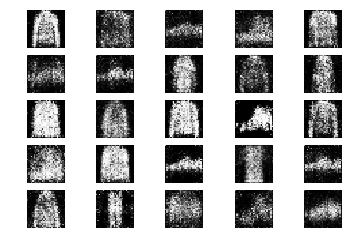

1401 [D loss: 0.593160, acc.: 71.88%] [G loss: 0.764960]
1402 [D loss: 0.629454, acc.: 59.38%] [G loss: 0.829164]
1403 [D loss: 0.675312, acc.: 65.62%] [G loss: 0.887051]
1404 [D loss: 0.637928, acc.: 65.62%] [G loss: 0.888748]
1405 [D loss: 0.654300, acc.: 60.94%] [G loss: 0.823374]
1406 [D loss: 0.641426, acc.: 67.19%] [G loss: 0.777328]
1407 [D loss: 0.583210, acc.: 76.56%] [G loss: 0.911678]
1408 [D loss: 0.640085, acc.: 62.50%] [G loss: 0.831425]
1409 [D loss: 0.519622, acc.: 76.56%] [G loss: 0.978030]
1410 [D loss: 0.634242, acc.: 60.94%] [G loss: 1.004507]
1411 [D loss: 0.600348, acc.: 71.88%] [G loss: 0.933067]
1412 [D loss: 0.678294, acc.: 62.50%] [G loss: 0.878617]
1413 [D loss: 0.673742, acc.: 59.38%] [G loss: 0.975953]
1414 [D loss: 0.624341, acc.: 64.06%] [G loss: 0.906499]
1415 [D loss: 0.641346, acc.: 64.06%] [G loss: 0.852483]
1416 [D loss: 0.622541, acc.: 59.38%] [G loss: 0.827063]
1417 [D loss: 0.614702, acc.: 64.06%] [G loss: 0.869480]
1418 [D loss: 0.570586, acc.: 7

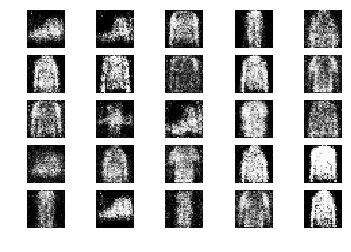

1451 [D loss: 0.604776, acc.: 76.56%] [G loss: 0.991436]
1452 [D loss: 0.604282, acc.: 70.31%] [G loss: 0.908827]
1453 [D loss: 0.558296, acc.: 76.56%] [G loss: 0.860643]
1454 [D loss: 0.646300, acc.: 62.50%] [G loss: 0.887986]
1455 [D loss: 0.656724, acc.: 62.50%] [G loss: 0.934681]
1456 [D loss: 0.612351, acc.: 64.06%] [G loss: 0.890537]
1457 [D loss: 0.648213, acc.: 60.94%] [G loss: 0.905648]
1458 [D loss: 0.644717, acc.: 67.19%] [G loss: 0.799614]
1459 [D loss: 0.628657, acc.: 70.31%] [G loss: 0.793177]
1460 [D loss: 0.571935, acc.: 73.44%] [G loss: 0.917216]
1461 [D loss: 0.659831, acc.: 64.06%] [G loss: 0.871575]
1462 [D loss: 0.637349, acc.: 67.19%] [G loss: 0.918897]
1463 [D loss: 0.629310, acc.: 64.06%] [G loss: 0.930150]
1464 [D loss: 0.673737, acc.: 56.25%] [G loss: 0.976964]
1465 [D loss: 0.570733, acc.: 71.88%] [G loss: 0.844542]
1466 [D loss: 0.638857, acc.: 57.81%] [G loss: 0.881907]
1467 [D loss: 0.659068, acc.: 65.62%] [G loss: 0.844155]
1468 [D loss: 0.648553, acc.: 7

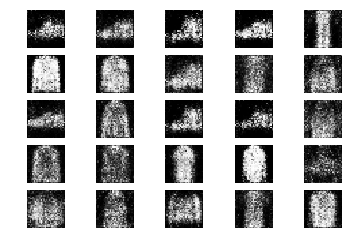

1501 [D loss: 0.544888, acc.: 76.56%] [G loss: 0.959728]
1502 [D loss: 0.664010, acc.: 62.50%] [G loss: 0.922269]
1503 [D loss: 0.604271, acc.: 70.31%] [G loss: 0.894138]
1504 [D loss: 0.667458, acc.: 59.38%] [G loss: 0.958505]
1505 [D loss: 0.589735, acc.: 70.31%] [G loss: 0.885009]
1506 [D loss: 0.626989, acc.: 57.81%] [G loss: 0.974380]
1507 [D loss: 0.664598, acc.: 54.69%] [G loss: 0.963817]
1508 [D loss: 0.613496, acc.: 65.62%] [G loss: 0.912557]
1509 [D loss: 0.615136, acc.: 70.31%] [G loss: 0.869808]
1510 [D loss: 0.647713, acc.: 59.38%] [G loss: 0.893410]
1511 [D loss: 0.560517, acc.: 70.31%] [G loss: 0.974116]
1512 [D loss: 0.624850, acc.: 65.62%] [G loss: 0.814787]
1513 [D loss: 0.556305, acc.: 75.00%] [G loss: 0.960571]
1514 [D loss: 0.630502, acc.: 65.62%] [G loss: 0.919891]
1515 [D loss: 0.610597, acc.: 68.75%] [G loss: 0.926708]
1516 [D loss: 0.661913, acc.: 59.38%] [G loss: 0.888174]
1517 [D loss: 0.686122, acc.: 53.12%] [G loss: 0.836334]
1518 [D loss: 0.678183, acc.: 6

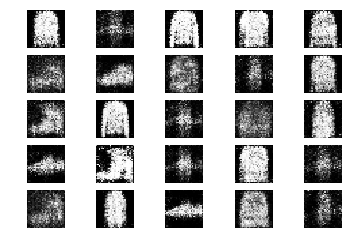

1551 [D loss: 0.626812, acc.: 62.50%] [G loss: 0.886784]
1552 [D loss: 0.632182, acc.: 70.31%] [G loss: 0.926179]
1553 [D loss: 0.627289, acc.: 67.19%] [G loss: 0.951083]
1554 [D loss: 0.590084, acc.: 70.31%] [G loss: 0.879062]
1555 [D loss: 0.656178, acc.: 64.06%] [G loss: 0.945414]
1556 [D loss: 0.628956, acc.: 65.62%] [G loss: 0.924016]
1557 [D loss: 0.608815, acc.: 67.19%] [G loss: 0.951021]
1558 [D loss: 0.581889, acc.: 76.56%] [G loss: 0.845589]
1559 [D loss: 0.603599, acc.: 75.00%] [G loss: 0.864026]
1560 [D loss: 0.644046, acc.: 60.94%] [G loss: 0.907480]
1561 [D loss: 0.615058, acc.: 67.19%] [G loss: 0.896540]
1562 [D loss: 0.635158, acc.: 70.31%] [G loss: 0.797915]
1563 [D loss: 0.634920, acc.: 62.50%] [G loss: 0.868562]
1564 [D loss: 0.577404, acc.: 65.62%] [G loss: 0.852454]
1565 [D loss: 0.617108, acc.: 62.50%] [G loss: 0.849481]
1566 [D loss: 0.591186, acc.: 73.44%] [G loss: 0.965956]
1567 [D loss: 0.590873, acc.: 68.75%] [G loss: 0.902544]
1568 [D loss: 0.633909, acc.: 6

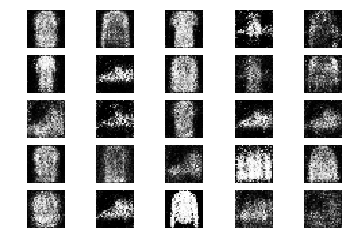

1601 [D loss: 0.678021, acc.: 53.12%] [G loss: 0.861421]
1602 [D loss: 0.609458, acc.: 60.94%] [G loss: 0.981891]
1603 [D loss: 0.517416, acc.: 73.44%] [G loss: 0.999186]
1604 [D loss: 0.579558, acc.: 73.44%] [G loss: 1.006066]
1605 [D loss: 0.640051, acc.: 62.50%] [G loss: 0.990592]
1606 [D loss: 0.601213, acc.: 65.62%] [G loss: 0.911033]
1607 [D loss: 0.544861, acc.: 67.19%] [G loss: 0.869566]
1608 [D loss: 0.608853, acc.: 67.19%] [G loss: 0.980560]
1609 [D loss: 0.618101, acc.: 75.00%] [G loss: 0.907331]
1610 [D loss: 0.656845, acc.: 57.81%] [G loss: 0.874817]
1611 [D loss: 0.674979, acc.: 62.50%] [G loss: 0.862032]
1612 [D loss: 0.595417, acc.: 68.75%] [G loss: 0.848025]
1613 [D loss: 0.614482, acc.: 64.06%] [G loss: 0.901880]
1614 [D loss: 0.649267, acc.: 62.50%] [G loss: 0.880838]
1615 [D loss: 0.661633, acc.: 62.50%] [G loss: 0.913357]
1616 [D loss: 0.620665, acc.: 60.94%] [G loss: 0.962809]
1617 [D loss: 0.637431, acc.: 59.38%] [G loss: 0.995622]
1618 [D loss: 0.594947, acc.: 6

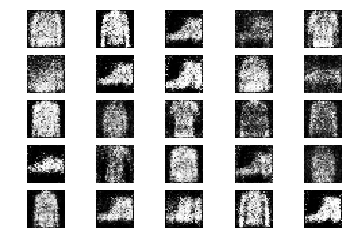

1651 [D loss: 0.697466, acc.: 56.25%] [G loss: 0.817805]
1652 [D loss: 0.590140, acc.: 76.56%] [G loss: 0.980351]
1653 [D loss: 0.636912, acc.: 62.50%] [G loss: 0.836678]
1654 [D loss: 0.560422, acc.: 76.56%] [G loss: 0.869097]
1655 [D loss: 0.590357, acc.: 67.19%] [G loss: 0.888311]
1656 [D loss: 0.585291, acc.: 67.19%] [G loss: 0.920963]
1657 [D loss: 0.652590, acc.: 60.94%] [G loss: 0.956157]
1658 [D loss: 0.644197, acc.: 62.50%] [G loss: 0.961519]
1659 [D loss: 0.565212, acc.: 78.12%] [G loss: 0.891353]
1660 [D loss: 0.608236, acc.: 64.06%] [G loss: 0.973787]
1661 [D loss: 0.667964, acc.: 54.69%] [G loss: 0.941115]
1662 [D loss: 0.613547, acc.: 68.75%] [G loss: 0.931366]
1663 [D loss: 0.639743, acc.: 60.94%] [G loss: 0.907916]
1664 [D loss: 0.701154, acc.: 56.25%] [G loss: 0.900378]
1665 [D loss: 0.631233, acc.: 59.38%] [G loss: 0.844672]
1666 [D loss: 0.643154, acc.: 62.50%] [G loss: 0.814023]
1667 [D loss: 0.609615, acc.: 64.06%] [G loss: 0.928194]
1668 [D loss: 0.632054, acc.: 5

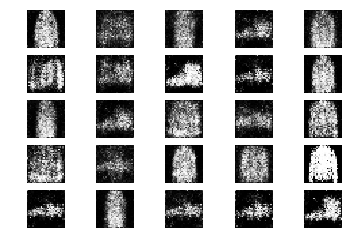

1701 [D loss: 0.541420, acc.: 79.69%] [G loss: 0.877046]
1702 [D loss: 0.611742, acc.: 68.75%] [G loss: 0.933093]
1703 [D loss: 0.588842, acc.: 71.88%] [G loss: 0.831133]
1704 [D loss: 0.600701, acc.: 70.31%] [G loss: 0.919663]
1705 [D loss: 0.571346, acc.: 73.44%] [G loss: 0.927231]
1706 [D loss: 0.612716, acc.: 62.50%] [G loss: 0.885225]
1707 [D loss: 0.619987, acc.: 60.94%] [G loss: 0.953059]
1708 [D loss: 0.638383, acc.: 59.38%] [G loss: 1.026031]
1709 [D loss: 0.621089, acc.: 64.06%] [G loss: 0.904420]
1710 [D loss: 0.580686, acc.: 75.00%] [G loss: 0.933375]
1711 [D loss: 0.579892, acc.: 70.31%] [G loss: 0.985491]
1712 [D loss: 0.642214, acc.: 60.94%] [G loss: 0.946262]
1713 [D loss: 0.594666, acc.: 67.19%] [G loss: 0.913254]
1714 [D loss: 0.595617, acc.: 75.00%] [G loss: 0.892040]
1715 [D loss: 0.660292, acc.: 56.25%] [G loss: 0.976336]
1716 [D loss: 0.606705, acc.: 59.38%] [G loss: 0.932744]
1717 [D loss: 0.644634, acc.: 64.06%] [G loss: 0.869169]
1718 [D loss: 0.558581, acc.: 7

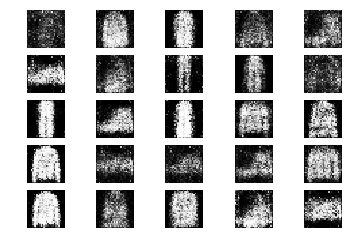

1751 [D loss: 0.578424, acc.: 75.00%] [G loss: 0.900294]
1752 [D loss: 0.643339, acc.: 59.38%] [G loss: 0.929072]
1753 [D loss: 0.609516, acc.: 70.31%] [G loss: 0.949135]
1754 [D loss: 0.622616, acc.: 67.19%] [G loss: 0.934945]
1755 [D loss: 0.591543, acc.: 71.88%] [G loss: 0.900875]
1756 [D loss: 0.545958, acc.: 78.12%] [G loss: 0.981137]
1757 [D loss: 0.577222, acc.: 68.75%] [G loss: 0.915464]
1758 [D loss: 0.649370, acc.: 64.06%] [G loss: 1.017441]
1759 [D loss: 0.639515, acc.: 59.38%] [G loss: 0.939398]
1760 [D loss: 0.595712, acc.: 71.88%] [G loss: 0.948210]
1761 [D loss: 0.608926, acc.: 73.44%] [G loss: 1.004246]
1762 [D loss: 0.626559, acc.: 59.38%] [G loss: 0.904698]
1763 [D loss: 0.654848, acc.: 57.81%] [G loss: 1.008138]
1764 [D loss: 0.646850, acc.: 65.62%] [G loss: 0.904910]
1765 [D loss: 0.570057, acc.: 60.94%] [G loss: 0.887197]
1766 [D loss: 0.612974, acc.: 71.88%] [G loss: 0.824928]
1767 [D loss: 0.606105, acc.: 65.62%] [G loss: 0.983459]
1768 [D loss: 0.597990, acc.: 7

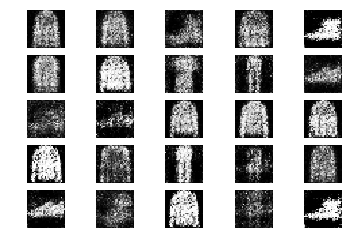

1801 [D loss: 0.615044, acc.: 62.50%] [G loss: 0.820666]
1802 [D loss: 0.619470, acc.: 64.06%] [G loss: 0.938149]
1803 [D loss: 0.533712, acc.: 76.56%] [G loss: 0.908776]
1804 [D loss: 0.566535, acc.: 73.44%] [G loss: 0.904744]
1805 [D loss: 0.597130, acc.: 71.88%] [G loss: 0.875717]
1806 [D loss: 0.604081, acc.: 64.06%] [G loss: 0.886803]
1807 [D loss: 0.570252, acc.: 71.88%] [G loss: 0.901623]
1808 [D loss: 0.592057, acc.: 70.31%] [G loss: 0.834379]
1809 [D loss: 0.593320, acc.: 67.19%] [G loss: 0.933211]
1810 [D loss: 0.584270, acc.: 68.75%] [G loss: 0.911535]
1811 [D loss: 0.581543, acc.: 73.44%] [G loss: 1.039191]
1812 [D loss: 0.658727, acc.: 54.69%] [G loss: 0.916782]
1813 [D loss: 0.624802, acc.: 62.50%] [G loss: 0.933141]
1814 [D loss: 0.669561, acc.: 54.69%] [G loss: 0.935543]
1815 [D loss: 0.629283, acc.: 65.62%] [G loss: 0.923627]
1816 [D loss: 0.582203, acc.: 71.88%] [G loss: 0.961873]
1817 [D loss: 0.616104, acc.: 64.06%] [G loss: 0.903685]
1818 [D loss: 0.725829, acc.: 5

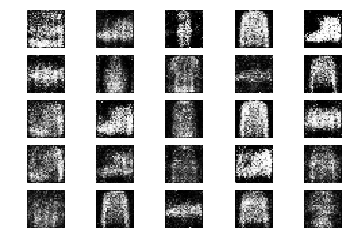

1851 [D loss: 0.646556, acc.: 57.81%] [G loss: 0.931422]
1852 [D loss: 0.608328, acc.: 78.12%] [G loss: 0.939742]
1853 [D loss: 0.686954, acc.: 64.06%] [G loss: 0.972523]
1854 [D loss: 0.612846, acc.: 65.62%] [G loss: 0.977435]
1855 [D loss: 0.568973, acc.: 70.31%] [G loss: 0.933887]
1856 [D loss: 0.705322, acc.: 53.12%] [G loss: 1.005257]
1857 [D loss: 0.623397, acc.: 64.06%] [G loss: 0.885448]
1858 [D loss: 0.595048, acc.: 64.06%] [G loss: 0.922394]
1859 [D loss: 0.630152, acc.: 62.50%] [G loss: 0.828035]
1860 [D loss: 0.573924, acc.: 71.88%] [G loss: 0.919924]
1861 [D loss: 0.561826, acc.: 73.44%] [G loss: 0.863731]
1862 [D loss: 0.558374, acc.: 73.44%] [G loss: 0.887997]
1863 [D loss: 0.631762, acc.: 67.19%] [G loss: 0.944259]
1864 [D loss: 0.540862, acc.: 76.56%] [G loss: 0.925025]
1865 [D loss: 0.585521, acc.: 65.62%] [G loss: 0.956411]
1866 [D loss: 0.657726, acc.: 56.25%] [G loss: 1.003343]
1867 [D loss: 0.669667, acc.: 53.12%] [G loss: 0.984230]
1868 [D loss: 0.533765, acc.: 8

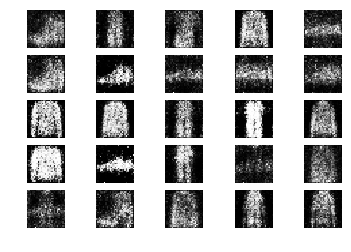

1901 [D loss: 0.617569, acc.: 64.06%] [G loss: 0.894402]
1902 [D loss: 0.576461, acc.: 73.44%] [G loss: 0.973735]
1903 [D loss: 0.606188, acc.: 68.75%] [G loss: 0.919127]
1904 [D loss: 0.615298, acc.: 64.06%] [G loss: 0.961866]
1905 [D loss: 0.595956, acc.: 67.19%] [G loss: 0.855611]
1906 [D loss: 0.521918, acc.: 79.69%] [G loss: 0.935987]
1907 [D loss: 0.587736, acc.: 67.19%] [G loss: 0.978748]
1908 [D loss: 0.686995, acc.: 51.56%] [G loss: 0.931499]
1909 [D loss: 0.600399, acc.: 71.88%] [G loss: 0.868667]
1910 [D loss: 0.652796, acc.: 62.50%] [G loss: 0.831066]
1911 [D loss: 0.546533, acc.: 73.44%] [G loss: 0.917951]
1912 [D loss: 0.625860, acc.: 65.62%] [G loss: 0.932347]
1913 [D loss: 0.554279, acc.: 73.44%] [G loss: 0.981748]
1914 [D loss: 0.687027, acc.: 46.88%] [G loss: 0.846600]
1915 [D loss: 0.616864, acc.: 67.19%] [G loss: 0.993346]
1916 [D loss: 0.631189, acc.: 60.94%] [G loss: 0.963121]
1917 [D loss: 0.660330, acc.: 65.62%] [G loss: 1.000102]
1918 [D loss: 0.652986, acc.: 6

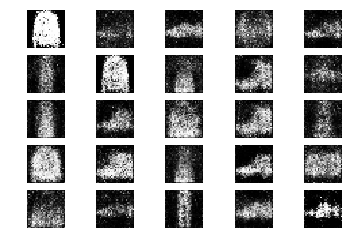

1951 [D loss: 0.592892, acc.: 64.06%] [G loss: 0.996377]
1952 [D loss: 0.577731, acc.: 73.44%] [G loss: 1.006191]
1953 [D loss: 0.653517, acc.: 60.94%] [G loss: 1.056689]
1954 [D loss: 0.548840, acc.: 75.00%] [G loss: 0.976960]
1955 [D loss: 0.581123, acc.: 67.19%] [G loss: 0.883046]
1956 [D loss: 0.660362, acc.: 53.12%] [G loss: 0.900289]
1957 [D loss: 0.646967, acc.: 57.81%] [G loss: 0.954777]
1958 [D loss: 0.631244, acc.: 59.38%] [G loss: 0.952348]
1959 [D loss: 0.605588, acc.: 67.19%] [G loss: 0.947631]
1960 [D loss: 0.647089, acc.: 57.81%] [G loss: 0.901185]
1961 [D loss: 0.567332, acc.: 70.31%] [G loss: 0.984645]
1962 [D loss: 0.594522, acc.: 73.44%] [G loss: 0.816827]
1963 [D loss: 0.620468, acc.: 62.50%] [G loss: 0.903276]
1964 [D loss: 0.515140, acc.: 76.56%] [G loss: 0.942560]
1965 [D loss: 0.601345, acc.: 70.31%] [G loss: 0.935198]
1966 [D loss: 0.617428, acc.: 68.75%] [G loss: 0.961691]
1967 [D loss: 0.591735, acc.: 62.50%] [G loss: 1.031800]
1968 [D loss: 0.543105, acc.: 7

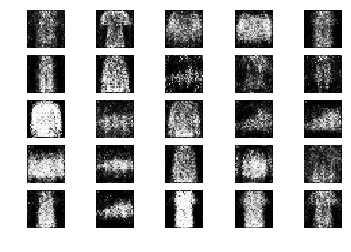

2001 [D loss: 0.643564, acc.: 73.44%] [G loss: 1.019266]
2002 [D loss: 0.660959, acc.: 60.94%] [G loss: 0.948898]
2003 [D loss: 0.638888, acc.: 56.25%] [G loss: 0.887492]
2004 [D loss: 0.571167, acc.: 71.88%] [G loss: 1.017742]
2005 [D loss: 0.585958, acc.: 73.44%] [G loss: 0.886823]
2006 [D loss: 0.650936, acc.: 64.06%] [G loss: 0.917466]
2007 [D loss: 0.632087, acc.: 62.50%] [G loss: 0.915425]
2008 [D loss: 0.583018, acc.: 68.75%] [G loss: 0.933236]
2009 [D loss: 0.644271, acc.: 65.62%] [G loss: 0.980821]
2010 [D loss: 0.567513, acc.: 71.88%] [G loss: 1.023890]
2011 [D loss: 0.702052, acc.: 54.69%] [G loss: 0.999639]
2012 [D loss: 0.615801, acc.: 67.19%] [G loss: 1.026589]
2013 [D loss: 0.592580, acc.: 70.31%] [G loss: 1.032185]
2014 [D loss: 0.604242, acc.: 68.75%] [G loss: 1.004056]
2015 [D loss: 0.621939, acc.: 64.06%] [G loss: 0.995878]
2016 [D loss: 0.630412, acc.: 62.50%] [G loss: 0.968640]
2017 [D loss: 0.647187, acc.: 62.50%] [G loss: 0.957251]
2018 [D loss: 0.542684, acc.: 7

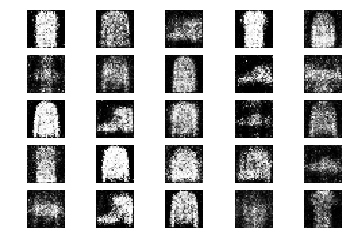

2051 [D loss: 0.586430, acc.: 65.62%] [G loss: 1.061152]
2052 [D loss: 0.584595, acc.: 78.12%] [G loss: 0.955313]
2053 [D loss: 0.676760, acc.: 60.94%] [G loss: 0.929126]
2054 [D loss: 0.572315, acc.: 71.88%] [G loss: 0.979560]
2055 [D loss: 0.637678, acc.: 59.38%] [G loss: 0.950716]
2056 [D loss: 0.618887, acc.: 65.62%] [G loss: 0.963519]
2057 [D loss: 0.558222, acc.: 73.44%] [G loss: 0.944108]
2058 [D loss: 0.562876, acc.: 73.44%] [G loss: 0.872149]
2059 [D loss: 0.633714, acc.: 54.69%] [G loss: 0.850114]
2060 [D loss: 0.595620, acc.: 59.38%] [G loss: 0.924984]
2061 [D loss: 0.636921, acc.: 59.38%] [G loss: 0.867371]
2062 [D loss: 0.640006, acc.: 64.06%] [G loss: 0.992772]
2063 [D loss: 0.681487, acc.: 54.69%] [G loss: 0.996086]
2064 [D loss: 0.664935, acc.: 64.06%] [G loss: 1.018446]
2065 [D loss: 0.662736, acc.: 56.25%] [G loss: 1.008802]
2066 [D loss: 0.614505, acc.: 71.88%] [G loss: 0.909974]
2067 [D loss: 0.585024, acc.: 65.62%] [G loss: 0.924957]
2068 [D loss: 0.598496, acc.: 6

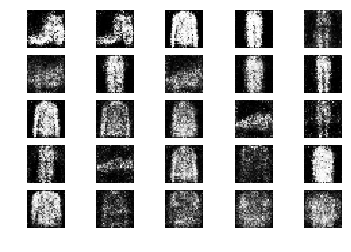

2101 [D loss: 0.579671, acc.: 71.88%] [G loss: 0.900449]
2102 [D loss: 0.618314, acc.: 67.19%] [G loss: 0.991022]
2103 [D loss: 0.614622, acc.: 67.19%] [G loss: 0.966932]
2104 [D loss: 0.604254, acc.: 62.50%] [G loss: 0.994547]
2105 [D loss: 0.650313, acc.: 62.50%] [G loss: 0.937991]
2106 [D loss: 0.647889, acc.: 62.50%] [G loss: 0.916995]
2107 [D loss: 0.566335, acc.: 73.44%] [G loss: 0.937463]
2108 [D loss: 0.592919, acc.: 73.44%] [G loss: 1.032819]
2109 [D loss: 0.604445, acc.: 67.19%] [G loss: 0.843420]
2110 [D loss: 0.547427, acc.: 81.25%] [G loss: 0.876027]
2111 [D loss: 0.614857, acc.: 65.62%] [G loss: 0.944743]
2112 [D loss: 0.695442, acc.: 59.38%] [G loss: 0.971901]
2113 [D loss: 0.566446, acc.: 68.75%] [G loss: 0.968040]
2114 [D loss: 0.676796, acc.: 53.12%] [G loss: 0.882247]
2115 [D loss: 0.635289, acc.: 54.69%] [G loss: 0.909789]
2116 [D loss: 0.609485, acc.: 64.06%] [G loss: 0.976895]
2117 [D loss: 0.639482, acc.: 70.31%] [G loss: 1.022609]
2118 [D loss: 0.650160, acc.: 6

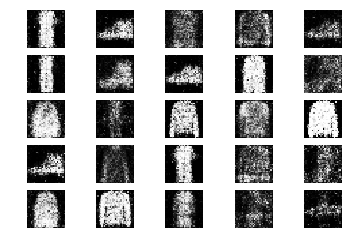

2151 [D loss: 0.591639, acc.: 70.31%] [G loss: 1.023327]
2152 [D loss: 0.587516, acc.: 75.00%] [G loss: 0.898312]
2153 [D loss: 0.634803, acc.: 62.50%] [G loss: 0.948766]
2154 [D loss: 0.624375, acc.: 62.50%] [G loss: 0.922587]
2155 [D loss: 0.633886, acc.: 67.19%] [G loss: 0.981139]
2156 [D loss: 0.578660, acc.: 68.75%] [G loss: 0.984494]
2157 [D loss: 0.601829, acc.: 67.19%] [G loss: 0.981085]
2158 [D loss: 0.584700, acc.: 67.19%] [G loss: 1.007892]
2159 [D loss: 0.600066, acc.: 64.06%] [G loss: 1.004343]
2160 [D loss: 0.577455, acc.: 71.88%] [G loss: 0.987934]
2161 [D loss: 0.607017, acc.: 68.75%] [G loss: 0.888382]
2162 [D loss: 0.622725, acc.: 67.19%] [G loss: 0.867684]
2163 [D loss: 0.649469, acc.: 60.94%] [G loss: 0.985896]
2164 [D loss: 0.639470, acc.: 70.31%] [G loss: 0.898584]
2165 [D loss: 0.613539, acc.: 68.75%] [G loss: 0.951529]
2166 [D loss: 0.567088, acc.: 71.88%] [G loss: 0.977724]
2167 [D loss: 0.579701, acc.: 70.31%] [G loss: 0.931190]
2168 [D loss: 0.638357, acc.: 6

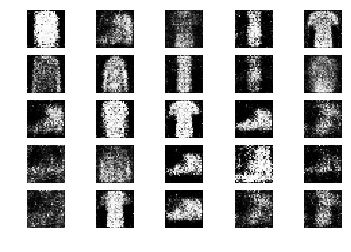

2201 [D loss: 0.627461, acc.: 64.06%] [G loss: 0.951161]
2202 [D loss: 0.595977, acc.: 60.94%] [G loss: 1.066577]
2203 [D loss: 0.674139, acc.: 62.50%] [G loss: 0.932578]
2204 [D loss: 0.623975, acc.: 65.62%] [G loss: 1.107243]
2205 [D loss: 0.526047, acc.: 75.00%] [G loss: 1.107891]
2206 [D loss: 0.627444, acc.: 68.75%] [G loss: 1.104280]
2207 [D loss: 0.686451, acc.: 51.56%] [G loss: 1.043388]
2208 [D loss: 0.564104, acc.: 75.00%] [G loss: 0.989909]
2209 [D loss: 0.581728, acc.: 65.62%] [G loss: 1.069010]
2210 [D loss: 0.674695, acc.: 60.94%] [G loss: 0.970057]
2211 [D loss: 0.592507, acc.: 57.81%] [G loss: 0.785138]
2212 [D loss: 0.609479, acc.: 64.06%] [G loss: 0.981543]
2213 [D loss: 0.508508, acc.: 81.25%] [G loss: 0.966576]
2214 [D loss: 0.626352, acc.: 56.25%] [G loss: 0.940652]
2215 [D loss: 0.614761, acc.: 59.38%] [G loss: 0.868012]
2216 [D loss: 0.565980, acc.: 73.44%] [G loss: 0.998237]
2217 [D loss: 0.583942, acc.: 75.00%] [G loss: 1.119829]
2218 [D loss: 0.632829, acc.: 6

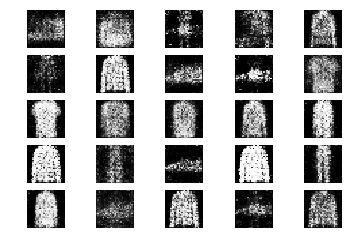

2251 [D loss: 0.601651, acc.: 65.62%] [G loss: 1.023589]
2252 [D loss: 0.575356, acc.: 71.88%] [G loss: 1.118958]
2253 [D loss: 0.639501, acc.: 65.62%] [G loss: 1.009917]
2254 [D loss: 0.542643, acc.: 70.31%] [G loss: 0.915240]
2255 [D loss: 0.648679, acc.: 60.94%] [G loss: 0.949136]
2256 [D loss: 0.579410, acc.: 76.56%] [G loss: 0.909273]
2257 [D loss: 0.607986, acc.: 67.19%] [G loss: 0.995837]
2258 [D loss: 0.595638, acc.: 64.06%] [G loss: 0.968841]
2259 [D loss: 0.576047, acc.: 71.88%] [G loss: 0.951446]
2260 [D loss: 0.632971, acc.: 59.38%] [G loss: 1.000331]
2261 [D loss: 0.594564, acc.: 70.31%] [G loss: 1.004342]
2262 [D loss: 0.612474, acc.: 70.31%] [G loss: 0.956394]
2263 [D loss: 0.660704, acc.: 64.06%] [G loss: 0.946888]
2264 [D loss: 0.549619, acc.: 76.56%] [G loss: 1.010411]
2265 [D loss: 0.598495, acc.: 62.50%] [G loss: 1.019805]
2266 [D loss: 0.607861, acc.: 65.62%] [G loss: 1.009223]
2267 [D loss: 0.541339, acc.: 75.00%] [G loss: 0.905033]
2268 [D loss: 0.548957, acc.: 7

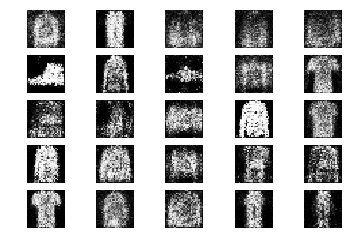

2301 [D loss: 0.601663, acc.: 64.06%] [G loss: 0.945058]
2302 [D loss: 0.620980, acc.: 70.31%] [G loss: 0.934127]
2303 [D loss: 0.619607, acc.: 60.94%] [G loss: 0.977849]
2304 [D loss: 0.598604, acc.: 67.19%] [G loss: 0.914665]
2305 [D loss: 0.562554, acc.: 75.00%] [G loss: 0.949556]
2306 [D loss: 0.642642, acc.: 59.38%] [G loss: 0.975587]
2307 [D loss: 0.607030, acc.: 70.31%] [G loss: 1.110909]
2308 [D loss: 0.596731, acc.: 68.75%] [G loss: 0.980581]
2309 [D loss: 0.636162, acc.: 65.62%] [G loss: 0.890372]
2310 [D loss: 0.578232, acc.: 68.75%] [G loss: 0.922374]
2311 [D loss: 0.530875, acc.: 71.88%] [G loss: 0.928867]
2312 [D loss: 0.603652, acc.: 70.31%] [G loss: 1.085008]
2313 [D loss: 0.606256, acc.: 62.50%] [G loss: 1.071382]
2314 [D loss: 0.556213, acc.: 79.69%] [G loss: 0.977259]
2315 [D loss: 0.623336, acc.: 62.50%] [G loss: 0.960966]
2316 [D loss: 0.478109, acc.: 81.25%] [G loss: 0.998585]
2317 [D loss: 0.635189, acc.: 62.50%] [G loss: 0.947588]
2318 [D loss: 0.657904, acc.: 6

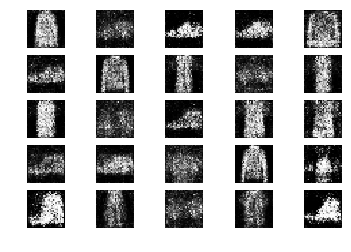

2351 [D loss: 0.636068, acc.: 59.38%] [G loss: 1.007654]
2352 [D loss: 0.615420, acc.: 60.94%] [G loss: 1.017882]
2353 [D loss: 0.650694, acc.: 62.50%] [G loss: 0.989465]
2354 [D loss: 0.544382, acc.: 75.00%] [G loss: 0.942739]
2355 [D loss: 0.560212, acc.: 73.44%] [G loss: 1.013073]
2356 [D loss: 0.606494, acc.: 59.38%] [G loss: 1.027866]
2357 [D loss: 0.575337, acc.: 71.88%] [G loss: 0.966121]
2358 [D loss: 0.637675, acc.: 59.38%] [G loss: 0.967052]
2359 [D loss: 0.570952, acc.: 73.44%] [G loss: 1.028157]
2360 [D loss: 0.611298, acc.: 67.19%] [G loss: 1.009004]
2361 [D loss: 0.595477, acc.: 68.75%] [G loss: 0.937126]
2362 [D loss: 0.630051, acc.: 68.75%] [G loss: 0.859236]
2363 [D loss: 0.648501, acc.: 60.94%] [G loss: 0.924004]
2364 [D loss: 0.529877, acc.: 76.56%] [G loss: 0.984366]
2365 [D loss: 0.553911, acc.: 73.44%] [G loss: 1.025101]
2366 [D loss: 0.599252, acc.: 67.19%] [G loss: 1.061459]
2367 [D loss: 0.630779, acc.: 59.38%] [G loss: 1.009978]
2368 [D loss: 0.590094, acc.: 6

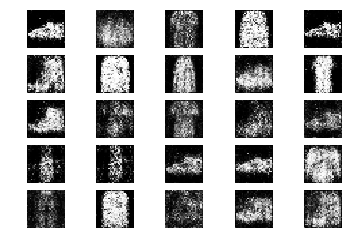

2401 [D loss: 0.512594, acc.: 81.25%] [G loss: 0.993926]
2402 [D loss: 0.587031, acc.: 67.19%] [G loss: 1.011149]
2403 [D loss: 0.569390, acc.: 70.31%] [G loss: 0.973058]
2404 [D loss: 0.577839, acc.: 78.12%] [G loss: 0.959778]
2405 [D loss: 0.612388, acc.: 64.06%] [G loss: 0.892986]
2406 [D loss: 0.598353, acc.: 67.19%] [G loss: 0.877955]
2407 [D loss: 0.685404, acc.: 56.25%] [G loss: 0.940949]
2408 [D loss: 0.602210, acc.: 65.62%] [G loss: 0.955110]
2409 [D loss: 0.609313, acc.: 71.88%] [G loss: 1.005086]
2410 [D loss: 0.576725, acc.: 68.75%] [G loss: 0.991823]
2411 [D loss: 0.659613, acc.: 48.44%] [G loss: 1.072174]
2412 [D loss: 0.498659, acc.: 82.81%] [G loss: 1.031435]
2413 [D loss: 0.601645, acc.: 62.50%] [G loss: 1.053946]
2414 [D loss: 0.593327, acc.: 68.75%] [G loss: 1.011182]
2415 [D loss: 0.671408, acc.: 57.81%] [G loss: 0.970356]
2416 [D loss: 0.650048, acc.: 65.62%] [G loss: 1.015108]
2417 [D loss: 0.597332, acc.: 65.62%] [G loss: 1.024507]
2418 [D loss: 0.691380, acc.: 5

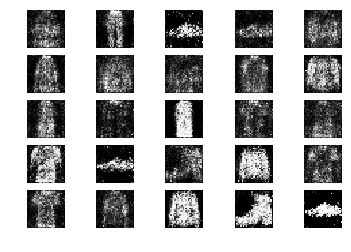

2451 [D loss: 0.672708, acc.: 53.12%] [G loss: 0.945210]
2452 [D loss: 0.638809, acc.: 62.50%] [G loss: 1.087380]
2453 [D loss: 0.641128, acc.: 64.06%] [G loss: 0.876081]
2454 [D loss: 0.610829, acc.: 64.06%] [G loss: 0.947016]
2455 [D loss: 0.603831, acc.: 62.50%] [G loss: 1.001643]
2456 [D loss: 0.529796, acc.: 79.69%] [G loss: 0.986181]
2457 [D loss: 0.593521, acc.: 70.31%] [G loss: 1.059554]
2458 [D loss: 0.580244, acc.: 60.94%] [G loss: 1.050347]
2459 [D loss: 0.619370, acc.: 64.06%] [G loss: 1.130890]
2460 [D loss: 0.597692, acc.: 70.31%] [G loss: 1.070972]
2461 [D loss: 0.708929, acc.: 53.12%] [G loss: 0.983516]
2462 [D loss: 0.602866, acc.: 68.75%] [G loss: 0.987366]
2463 [D loss: 0.618176, acc.: 67.19%] [G loss: 0.973401]
2464 [D loss: 0.612620, acc.: 60.94%] [G loss: 0.984722]
2465 [D loss: 0.624883, acc.: 60.94%] [G loss: 0.941118]
2466 [D loss: 0.563346, acc.: 68.75%] [G loss: 1.028259]
2467 [D loss: 0.598758, acc.: 67.19%] [G loss: 1.038521]
2468 [D loss: 0.626063, acc.: 6

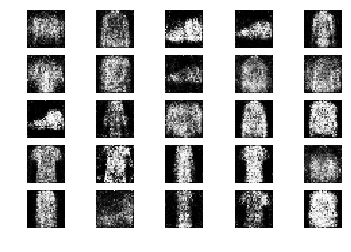

2501 [D loss: 0.583676, acc.: 68.75%] [G loss: 0.956100]
2502 [D loss: 0.621279, acc.: 71.88%] [G loss: 0.991177]
2503 [D loss: 0.619065, acc.: 67.19%] [G loss: 0.977800]
2504 [D loss: 0.578427, acc.: 68.75%] [G loss: 1.024104]
2505 [D loss: 0.584066, acc.: 67.19%] [G loss: 1.059254]
2506 [D loss: 0.596444, acc.: 65.62%] [G loss: 1.076890]
2507 [D loss: 0.615913, acc.: 65.62%] [G loss: 1.048955]
2508 [D loss: 0.542293, acc.: 70.31%] [G loss: 0.905850]
2509 [D loss: 0.611728, acc.: 71.88%] [G loss: 0.955769]
2510 [D loss: 0.726024, acc.: 62.50%] [G loss: 1.029763]
2511 [D loss: 0.596506, acc.: 70.31%] [G loss: 1.069392]
2512 [D loss: 0.740364, acc.: 56.25%] [G loss: 0.943028]
2513 [D loss: 0.598562, acc.: 70.31%] [G loss: 0.917941]
2514 [D loss: 0.645378, acc.: 64.06%] [G loss: 1.010503]
2515 [D loss: 0.609924, acc.: 67.19%] [G loss: 0.904718]
2516 [D loss: 0.630539, acc.: 60.94%] [G loss: 1.006188]
2517 [D loss: 0.620818, acc.: 65.62%] [G loss: 0.977474]
2518 [D loss: 0.617976, acc.: 6

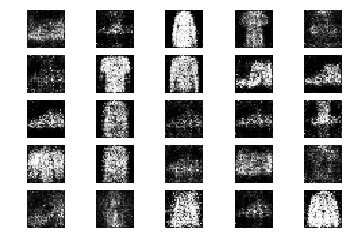

2551 [D loss: 0.658215, acc.: 51.56%] [G loss: 0.950593]
2552 [D loss: 0.582507, acc.: 73.44%] [G loss: 0.938353]
2553 [D loss: 0.594575, acc.: 62.50%] [G loss: 0.962120]
2554 [D loss: 0.541413, acc.: 73.44%] [G loss: 1.014274]
2555 [D loss: 0.551997, acc.: 75.00%] [G loss: 0.969762]
2556 [D loss: 0.602915, acc.: 65.62%] [G loss: 0.990656]
2557 [D loss: 0.557082, acc.: 73.44%] [G loss: 0.917321]
2558 [D loss: 0.679676, acc.: 59.38%] [G loss: 0.935016]
2559 [D loss: 0.648724, acc.: 59.38%] [G loss: 1.045927]
2560 [D loss: 0.683517, acc.: 60.94%] [G loss: 0.955071]
2561 [D loss: 0.623311, acc.: 60.94%] [G loss: 0.915112]
2562 [D loss: 0.577758, acc.: 76.56%] [G loss: 0.986467]
2563 [D loss: 0.568722, acc.: 73.44%] [G loss: 1.031500]
2564 [D loss: 0.664397, acc.: 57.81%] [G loss: 1.001092]
2565 [D loss: 0.523891, acc.: 73.44%] [G loss: 1.003918]
2566 [D loss: 0.577475, acc.: 68.75%] [G loss: 0.989228]
2567 [D loss: 0.589685, acc.: 70.31%] [G loss: 0.935027]
2568 [D loss: 0.589764, acc.: 6

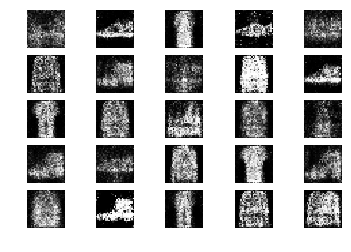

2601 [D loss: 0.598696, acc.: 70.31%] [G loss: 0.964985]
2602 [D loss: 0.593757, acc.: 60.94%] [G loss: 1.021578]
2603 [D loss: 0.570258, acc.: 71.88%] [G loss: 0.958379]
2604 [D loss: 0.650455, acc.: 57.81%] [G loss: 0.998997]
2605 [D loss: 0.536289, acc.: 79.69%] [G loss: 0.789469]
2606 [D loss: 0.590606, acc.: 65.62%] [G loss: 0.768755]
2607 [D loss: 0.615932, acc.: 62.50%] [G loss: 0.947576]
2608 [D loss: 0.558017, acc.: 71.88%] [G loss: 0.933147]
2609 [D loss: 0.475268, acc.: 82.81%] [G loss: 0.945963]
2610 [D loss: 0.558089, acc.: 62.50%] [G loss: 0.935728]
2611 [D loss: 0.571159, acc.: 68.75%] [G loss: 0.968741]
2612 [D loss: 0.578144, acc.: 54.69%] [G loss: 0.889793]
2613 [D loss: 0.654011, acc.: 57.81%] [G loss: 0.961059]
2614 [D loss: 0.618358, acc.: 68.75%] [G loss: 1.023568]
2615 [D loss: 0.591344, acc.: 70.31%] [G loss: 0.961691]
2616 [D loss: 0.557708, acc.: 62.50%] [G loss: 1.041943]
2617 [D loss: 0.618092, acc.: 60.94%] [G loss: 1.114253]
2618 [D loss: 0.635064, acc.: 6

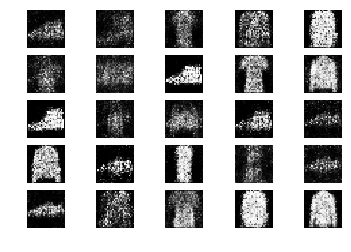

2651 [D loss: 0.585327, acc.: 67.19%] [G loss: 1.001783]
2652 [D loss: 0.627795, acc.: 60.94%] [G loss: 0.907659]
2653 [D loss: 0.585897, acc.: 67.19%] [G loss: 0.952754]
2654 [D loss: 0.648276, acc.: 57.81%] [G loss: 0.878160]
2655 [D loss: 0.634112, acc.: 60.94%] [G loss: 0.931146]
2656 [D loss: 0.691643, acc.: 51.56%] [G loss: 1.011431]
2657 [D loss: 0.582170, acc.: 67.19%] [G loss: 1.024550]
2658 [D loss: 0.599429, acc.: 62.50%] [G loss: 0.955443]
2659 [D loss: 0.644270, acc.: 60.94%] [G loss: 0.936004]
2660 [D loss: 0.661473, acc.: 57.81%] [G loss: 0.976849]
2661 [D loss: 0.620470, acc.: 65.62%] [G loss: 1.018896]
2662 [D loss: 0.590543, acc.: 67.19%] [G loss: 1.066149]
2663 [D loss: 0.598142, acc.: 68.75%] [G loss: 1.027105]
2664 [D loss: 0.676292, acc.: 54.69%] [G loss: 1.028803]
2665 [D loss: 0.600174, acc.: 64.06%] [G loss: 0.962081]
2666 [D loss: 0.601073, acc.: 65.62%] [G loss: 1.008699]
2667 [D loss: 0.610699, acc.: 64.06%] [G loss: 0.983323]
2668 [D loss: 0.578414, acc.: 7

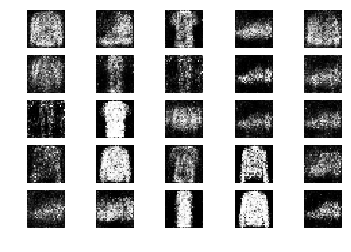

2701 [D loss: 0.715031, acc.: 54.69%] [G loss: 0.921041]
2702 [D loss: 0.616211, acc.: 59.38%] [G loss: 1.005517]
2703 [D loss: 0.645720, acc.: 67.19%] [G loss: 0.885048]
2704 [D loss: 0.584694, acc.: 57.81%] [G loss: 0.982176]
2705 [D loss: 0.676529, acc.: 60.94%] [G loss: 0.798726]
2706 [D loss: 0.703461, acc.: 56.25%] [G loss: 0.894101]
2707 [D loss: 0.516273, acc.: 76.56%] [G loss: 0.883916]
2708 [D loss: 0.637042, acc.: 68.75%] [G loss: 0.956695]
2709 [D loss: 0.589374, acc.: 60.94%] [G loss: 1.085110]
2710 [D loss: 0.622906, acc.: 70.31%] [G loss: 1.007419]
2711 [D loss: 0.617132, acc.: 64.06%] [G loss: 1.048813]
2712 [D loss: 0.637196, acc.: 64.06%] [G loss: 1.059705]
2713 [D loss: 0.597327, acc.: 67.19%] [G loss: 0.925009]
2714 [D loss: 0.593689, acc.: 68.75%] [G loss: 1.122322]
2715 [D loss: 0.631875, acc.: 71.88%] [G loss: 1.078406]
2716 [D loss: 0.687966, acc.: 62.50%] [G loss: 1.096702]
2717 [D loss: 0.616548, acc.: 65.62%] [G loss: 1.022737]
2718 [D loss: 0.608863, acc.: 6

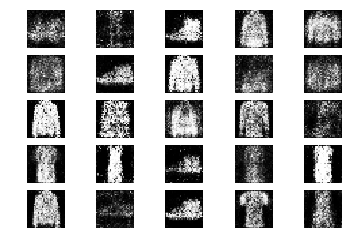

2751 [D loss: 0.641451, acc.: 71.88%] [G loss: 0.947122]
2752 [D loss: 0.547127, acc.: 78.12%] [G loss: 0.886101]
2753 [D loss: 0.652688, acc.: 54.69%] [G loss: 0.939644]
2754 [D loss: 0.627511, acc.: 57.81%] [G loss: 0.909337]
2755 [D loss: 0.532699, acc.: 73.44%] [G loss: 0.939376]
2756 [D loss: 0.593690, acc.: 71.88%] [G loss: 0.933281]
2757 [D loss: 0.574749, acc.: 71.88%] [G loss: 0.957431]
2758 [D loss: 0.661498, acc.: 60.94%] [G loss: 0.904631]
2759 [D loss: 0.587057, acc.: 65.62%] [G loss: 0.939718]
2760 [D loss: 0.553337, acc.: 70.31%] [G loss: 0.990746]
2761 [D loss: 0.610219, acc.: 73.44%] [G loss: 0.940800]
2762 [D loss: 0.617281, acc.: 67.19%] [G loss: 1.018855]
2763 [D loss: 0.660227, acc.: 56.25%] [G loss: 1.025900]
2764 [D loss: 0.612071, acc.: 64.06%] [G loss: 0.962329]
2765 [D loss: 0.644772, acc.: 56.25%] [G loss: 0.930794]
2766 [D loss: 0.650696, acc.: 62.50%] [G loss: 1.104308]
2767 [D loss: 0.642172, acc.: 59.38%] [G loss: 0.922523]
2768 [D loss: 0.617981, acc.: 6

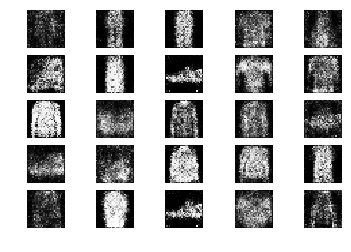

2801 [D loss: 0.530634, acc.: 81.25%] [G loss: 0.887915]
2802 [D loss: 0.630321, acc.: 64.06%] [G loss: 0.993761]
2803 [D loss: 0.646939, acc.: 67.19%] [G loss: 0.994607]
2804 [D loss: 0.520414, acc.: 71.88%] [G loss: 1.003776]
2805 [D loss: 0.659635, acc.: 59.38%] [G loss: 0.945066]
2806 [D loss: 0.580787, acc.: 70.31%] [G loss: 0.962749]
2807 [D loss: 0.605031, acc.: 65.62%] [G loss: 1.073224]
2808 [D loss: 0.606000, acc.: 68.75%] [G loss: 0.983130]
2809 [D loss: 0.603833, acc.: 64.06%] [G loss: 0.957333]
2810 [D loss: 0.662408, acc.: 64.06%] [G loss: 1.009077]
2811 [D loss: 0.602278, acc.: 70.31%] [G loss: 1.052065]
2812 [D loss: 0.600103, acc.: 67.19%] [G loss: 1.044529]
2813 [D loss: 0.593388, acc.: 65.62%] [G loss: 0.965192]
2814 [D loss: 0.639236, acc.: 60.94%] [G loss: 0.925966]
2815 [D loss: 0.609442, acc.: 64.06%] [G loss: 0.911580]
2816 [D loss: 0.629047, acc.: 59.38%] [G loss: 0.846869]
2817 [D loss: 0.680592, acc.: 59.38%] [G loss: 1.004644]
2818 [D loss: 0.576742, acc.: 7

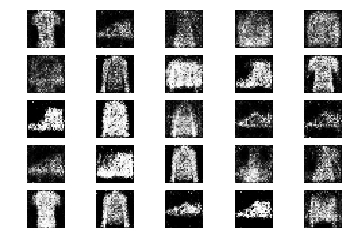

2851 [D loss: 0.684805, acc.: 57.81%] [G loss: 0.901622]
2852 [D loss: 0.617928, acc.: 67.19%] [G loss: 1.039400]
2853 [D loss: 0.684503, acc.: 59.38%] [G loss: 0.955578]
2854 [D loss: 0.597233, acc.: 68.75%] [G loss: 0.942533]
2855 [D loss: 0.623546, acc.: 65.62%] [G loss: 0.918371]
2856 [D loss: 0.564881, acc.: 70.31%] [G loss: 0.978053]
2857 [D loss: 0.620270, acc.: 62.50%] [G loss: 0.979028]
2858 [D loss: 0.629754, acc.: 64.06%] [G loss: 0.984083]
2859 [D loss: 0.588984, acc.: 67.19%] [G loss: 1.054666]
2860 [D loss: 0.609661, acc.: 68.75%] [G loss: 1.022481]
2861 [D loss: 0.517084, acc.: 78.12%] [G loss: 0.995348]
2862 [D loss: 0.624985, acc.: 59.38%] [G loss: 1.065563]
2863 [D loss: 0.569625, acc.: 68.75%] [G loss: 1.000582]
2864 [D loss: 0.563556, acc.: 73.44%] [G loss: 0.968361]
2865 [D loss: 0.620659, acc.: 59.38%] [G loss: 0.958392]
2866 [D loss: 0.549483, acc.: 71.88%] [G loss: 1.001174]
2867 [D loss: 0.579621, acc.: 67.19%] [G loss: 0.955743]
2868 [D loss: 0.659986, acc.: 6

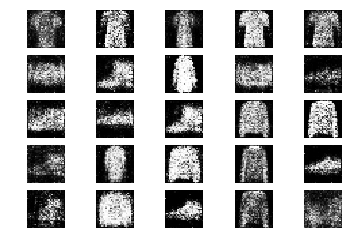

2901 [D loss: 0.591626, acc.: 70.31%] [G loss: 0.902424]
2902 [D loss: 0.632344, acc.: 57.81%] [G loss: 1.031745]
2903 [D loss: 0.590752, acc.: 68.75%] [G loss: 1.055596]
2904 [D loss: 0.626257, acc.: 64.06%] [G loss: 1.018916]
2905 [D loss: 0.565963, acc.: 71.88%] [G loss: 0.992916]
2906 [D loss: 0.605241, acc.: 68.75%] [G loss: 0.910871]
2907 [D loss: 0.595236, acc.: 70.31%] [G loss: 1.095199]
2908 [D loss: 0.667676, acc.: 56.25%] [G loss: 1.026510]
2909 [D loss: 0.589265, acc.: 68.75%] [G loss: 0.928120]
2910 [D loss: 0.635229, acc.: 60.94%] [G loss: 1.123722]
2911 [D loss: 0.619105, acc.: 64.06%] [G loss: 0.876036]
2912 [D loss: 0.573991, acc.: 64.06%] [G loss: 0.920477]
2913 [D loss: 0.626264, acc.: 65.62%] [G loss: 0.860116]
2914 [D loss: 0.700644, acc.: 56.25%] [G loss: 0.879109]
2915 [D loss: 0.656144, acc.: 60.94%] [G loss: 0.972925]
2916 [D loss: 0.617050, acc.: 68.75%] [G loss: 0.917396]
2917 [D loss: 0.683316, acc.: 57.81%] [G loss: 0.815776]
2918 [D loss: 0.576559, acc.: 6

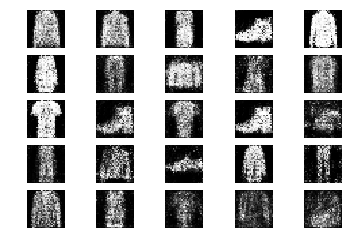

2951 [D loss: 0.703624, acc.: 51.56%] [G loss: 0.957260]
2952 [D loss: 0.655838, acc.: 56.25%] [G loss: 0.910712]
2953 [D loss: 0.610195, acc.: 65.62%] [G loss: 0.964030]
2954 [D loss: 0.566558, acc.: 68.75%] [G loss: 1.018724]
2955 [D loss: 0.592272, acc.: 71.88%] [G loss: 0.914011]
2956 [D loss: 0.582703, acc.: 67.19%] [G loss: 0.957520]
2957 [D loss: 0.642087, acc.: 67.19%] [G loss: 0.971473]
2958 [D loss: 0.639228, acc.: 62.50%] [G loss: 1.003926]
2959 [D loss: 0.684321, acc.: 53.12%] [G loss: 0.963494]
2960 [D loss: 0.587847, acc.: 73.44%] [G loss: 0.944917]
2961 [D loss: 0.623840, acc.: 67.19%] [G loss: 1.047616]
2962 [D loss: 0.642725, acc.: 65.62%] [G loss: 1.010199]
2963 [D loss: 0.658012, acc.: 59.38%] [G loss: 1.024562]
2964 [D loss: 0.627775, acc.: 60.94%] [G loss: 0.988853]
2965 [D loss: 0.633823, acc.: 65.62%] [G loss: 0.978929]
2966 [D loss: 0.635860, acc.: 60.94%] [G loss: 0.990001]
2967 [D loss: 0.643689, acc.: 60.94%] [G loss: 0.942877]
2968 [D loss: 0.555521, acc.: 7

In [43]:
epochs = 3000

batch_size = 32
sample_interval = 50
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, latent_dim))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, latent_dim))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % sample_interval == 0:
    sample_images(epoch)

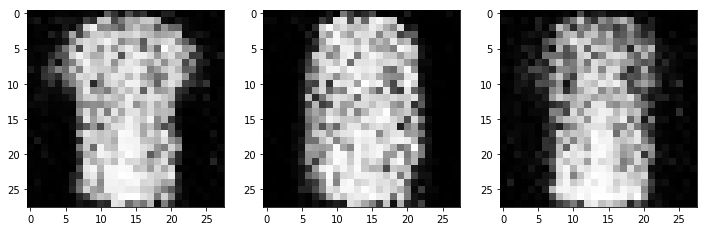

In [44]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, latent_dim))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()